In [ ]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
#Web Requests
import requests

# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical methods
from scipy.stats import chi2_contingency, randint, uniform
from scipy.optimize import linprog


# Machine learning model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Neural networks
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Concatenate, Embedding, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.utils import plot_model

# Neural Network Hyperparameter tuning
import keras_tuner

# Graph visualization
from sklearn.tree import export_graphviz
import graphviz

# IPython display tools
from IPython.display import Image

# Miscellaneous
import random
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
# Extract the file ID from the shareable link
data_id = '1WuqBGGYoran9LzLqtbgvow_2KbV8VZwY'

# Create the direct download link
download_link = f'https://drive.google.com/uc?export=download&id={data_id}'

# Download the file using requests
response = requests.get(download_link)
with open('/content/cvd_data.csv', 'wb') as file:
    file.write(response.content)

# Load the dataset
data = pd.read_csv('/content/cvd_data.csv',sep=";")

# Display the first 5 rows as a confirmation of successful loading
data.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [ ]:
#Checking last 5 observations in dataset
data.tail()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

In [ ]:
data.info() #Show basic information of the CVD dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#Tranpose statistical summary of CVD dataset for enhanced readability
data.describe().T

count          mean           std      min       25%      50%  \
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          70000.0  19468.865814   2467.251667  10798.0  17664.00  19703.0   
gender       70000.0      1.349571      0.476838      1.0      1.00      1.0   
height       70000.0    164.359229      8.210126     55.0    159.00    165.0   
weight       70000.0     74.205690     14.395757     10.0     65.00     72.0   
ap_hi        70000.0    128.817286    154.011419   -150.0    120.00    120.0   
ap_lo        70000.0     96.630414    188.472530    -70.0     80.00     80.0   
cholesterol  70000.0      1.366871      0.680250      1.0      1.00      1.0   
gluc         70000.0      1.226457      0.572270      1.0      1.00      1.0   
smoke        70000.0      0.088129      0.283484      0.0      0.00      0.0   
alco         70000.0      0.053771      0.225568      0.0      0.00      0.0   
active       70000.0      0.803729      0.397179      0.0      1.00      1.0   
cardio       70000.0      0.499700      0.500003      0.0      0.00      0.0   

                  75%      max  
id           74889.25  99999.0  
age          21327.00  23713.0  
gender           2.00      2.0  
height         170.00    250.0  
weight          82.00    200.0  
ap_hi          140.00  16020.0  
ap_lo           90.00  11000.0  
cholesterol      2.00      3.0  
gluc             1.00      3.0  
smoke            0.00      1.0  
alco             0.00      1.0  
active           1.00      1.0  
cardio           1.00      1.0

In [ ]:
#Removing ID column as it doesn't contribute to model performance and could introduce noise
data = data.drop(['id'], axis = 1)

In [ ]:
#Checking for null and duplicated entries
duplicated=data.duplicated().sum()
print(f"Duplicated entries is {duplicated}")
print(f"Number of null values in each column is \n{data.isnull().sum()}")

Duplicated entries is 24
Number of null values in each column is 
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
#Checking for number of unique entries to determine suitability of binning numerical features
data.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [ ]:
#Checking for class imbalance in target feature

class_counts = data['cardio'].value_counts()
print(class_counts)

cardio
0    35021
1    34979
Name: count, dtype: int64


From above, we can see a fairly balanced class distribution across the target feature

The above data.describe() data indicates a strong possibility of significant outliers in columns like ap_hi,ap_lo.Specifically, ap_lo and ap_hi have unnaturally high max values of 11000 and 16020. Let us confirm the presence of outliers with boxplots

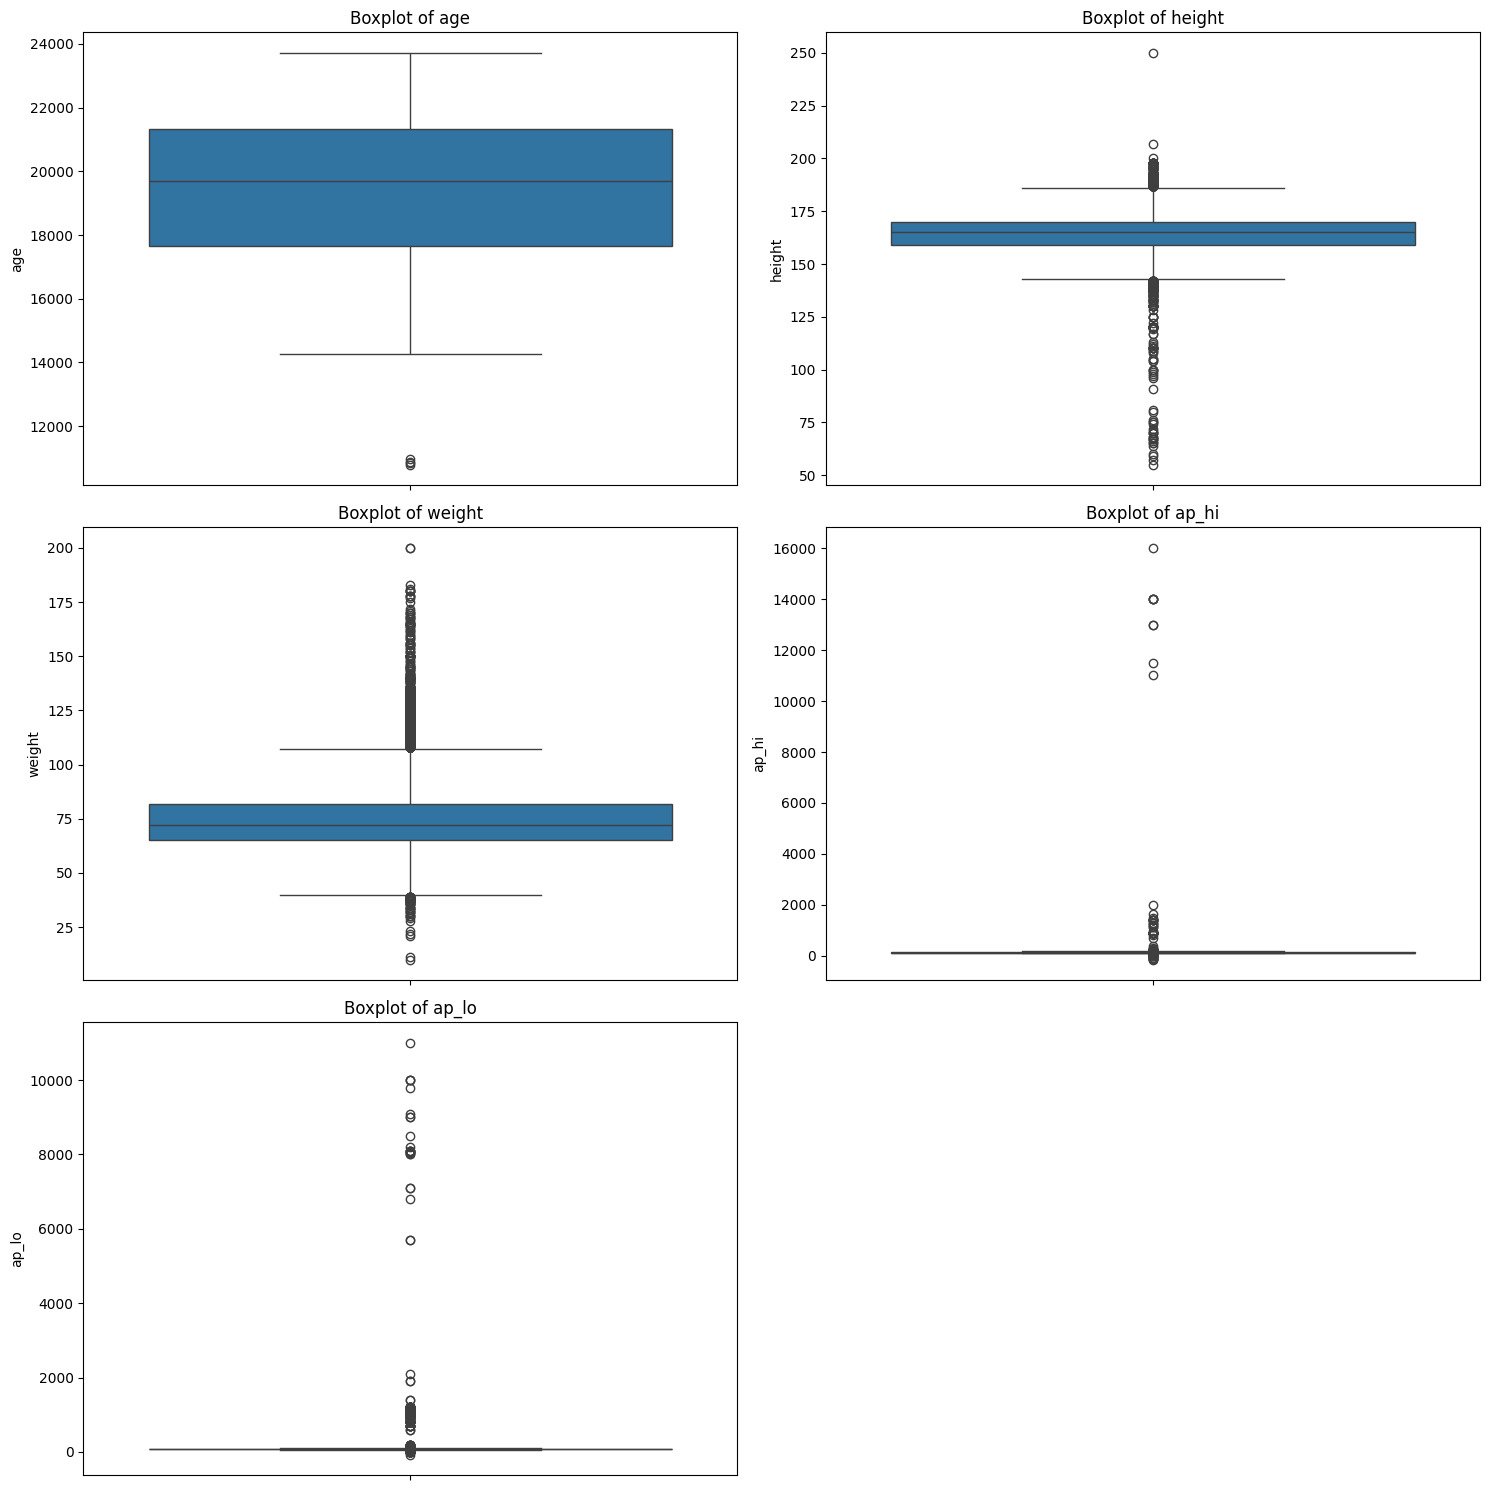

In [ ]:
# Calculate the number of continuous features

continuous_features = data.columns[data.nunique() > 20]

num_features = len(continuous_features)

# Construct a grid of subplots

fig, axes = plt.subplots(nrows=num_features//2 + num_features%2, ncols=2, figsize=(15, num_features * 3))

# Flattening the axes array for simplified iteration

axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.boxplot(data=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Eradicate any empty subplots should the number of features be odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Leveraging a more holistic IQR method to find columns with outliers

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Calculating the outliers in each column using the IQR method
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Sum the number of outliers in each column
outlier_counts = outliers.sum()

print(outlier_counts)

age                4
gender             0
height           519
weight          1819
ap_hi           1435
ap_lo           4632
cholesterol        0
gluc           10521
smoke           6169
alco            3764
active         13739
cardio             0
dtype: int64


Note that columns like cholesterol,gluc(Glucose),smoke(Smoking),alco(Alcohol intake), and active (Physical activity) are categorical bands.

However, continuous columns like height, weight,ap_hi (Systolic blood pressure) and ap_lo (Diastolic blood pressure) show substantial amounts of outliers

It is known that outliers disproportionately distort the model's parameters and predictions, typically triggering poor generalization to new data.

This necessitates removing outliers so that our model can better capture the underlying patterns in the data.


In [ ]:
# First, let us define the columns we would check for outliers
columns_with_outliers = ["height","weight","ap_hi", "ap_lo"]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for ap_hi and ap_lo
Q1 = data[columns_with_outliers].quantile(0.25)
Q3 = data[columns_with_outliers].quantile(0.75)
IQR = Q3 - Q1

# Calculating outliers in each column using the IQR method
outliers_to_be_removed = ((data[columns_with_outliers] < (Q1 - 1.5 * IQR)) | (data[columns_with_outliers] > (Q3 + 1.5 * IQR)))

# Next, create a boolean mask for the rows without outliers

mask = ~outliers_to_be_removed.any(axis=1)

# Filter the data to remove outliers
cleaned_data = data[mask]

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")


Original data shape: (70000, 12)
Cleaned data shape: (62505, 12)


In [ ]:
data=cleaned_data

## **EDA**

### Univariate Analysis

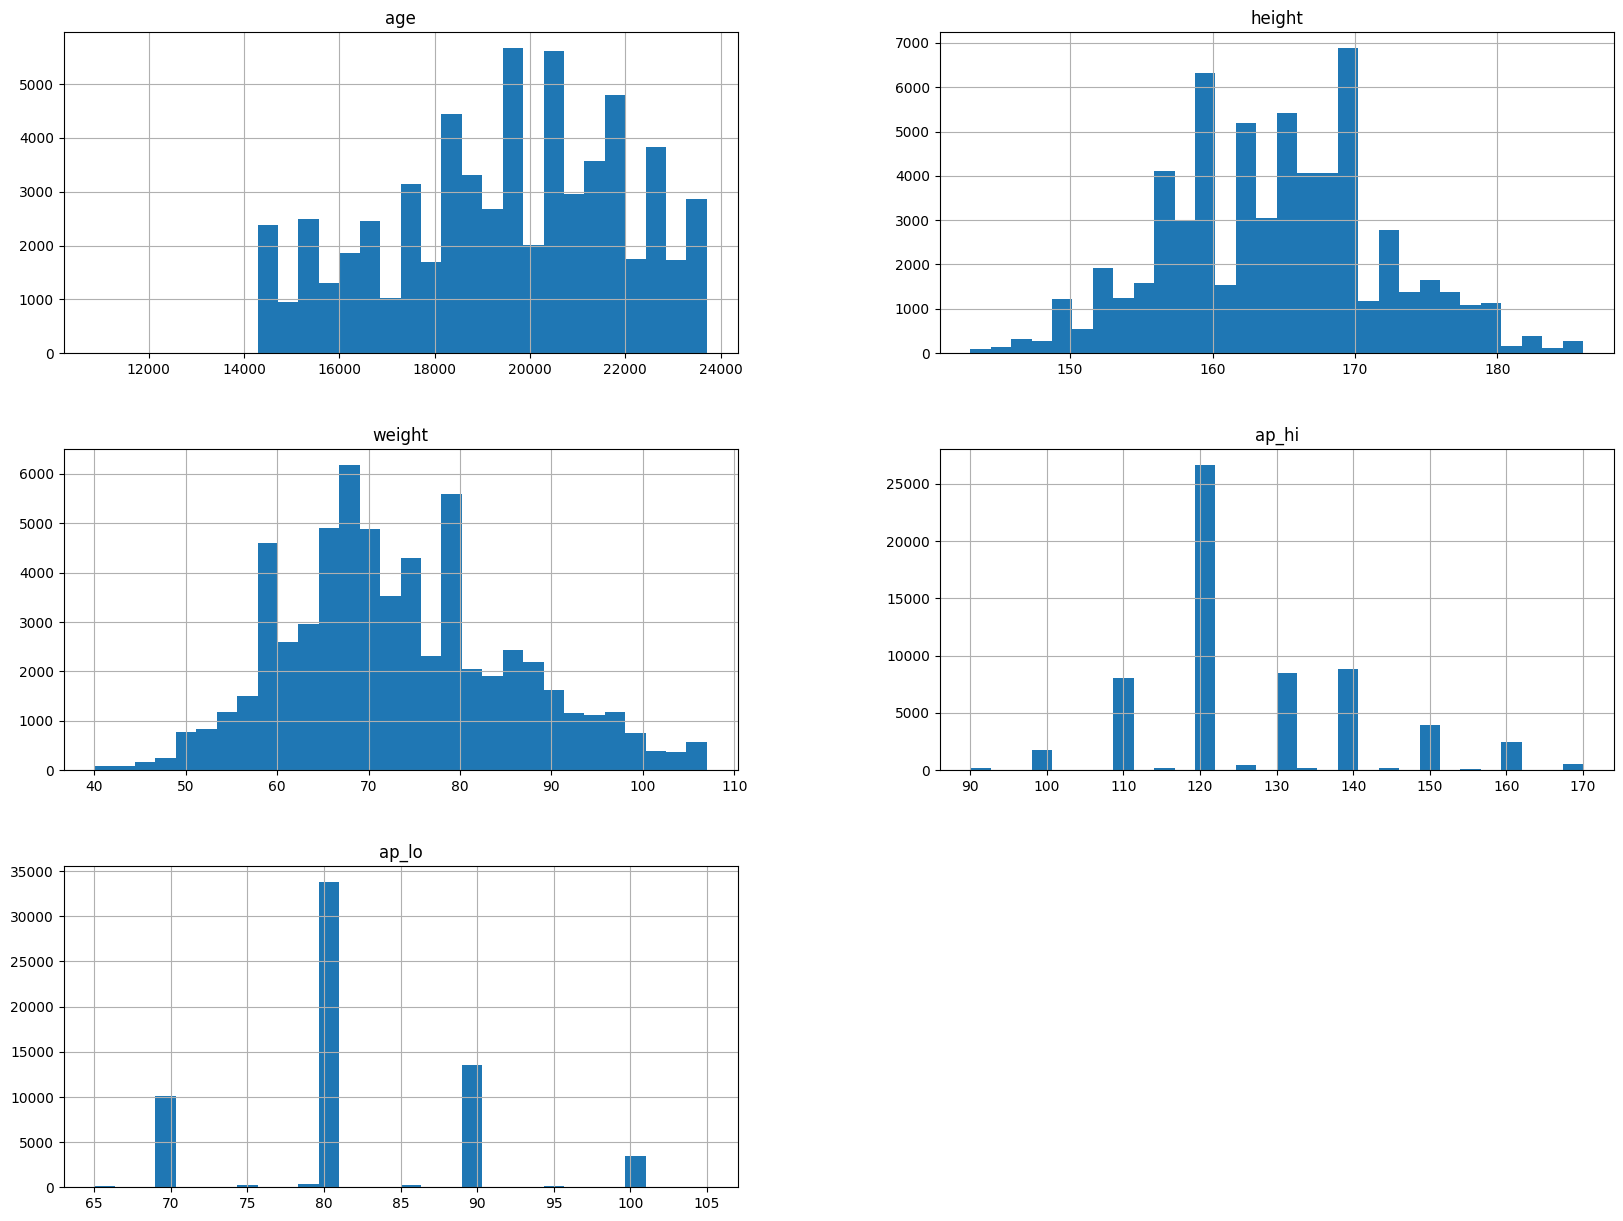

In [ ]:
# Create histograms for continuous features contained in data

data[continuous_features].hist(bins=30, figsize=(20, 15))
plt.show()

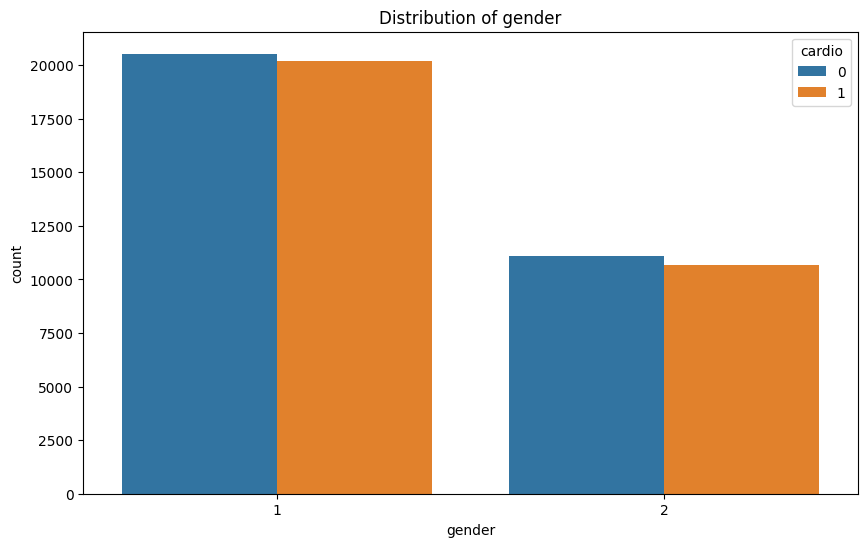

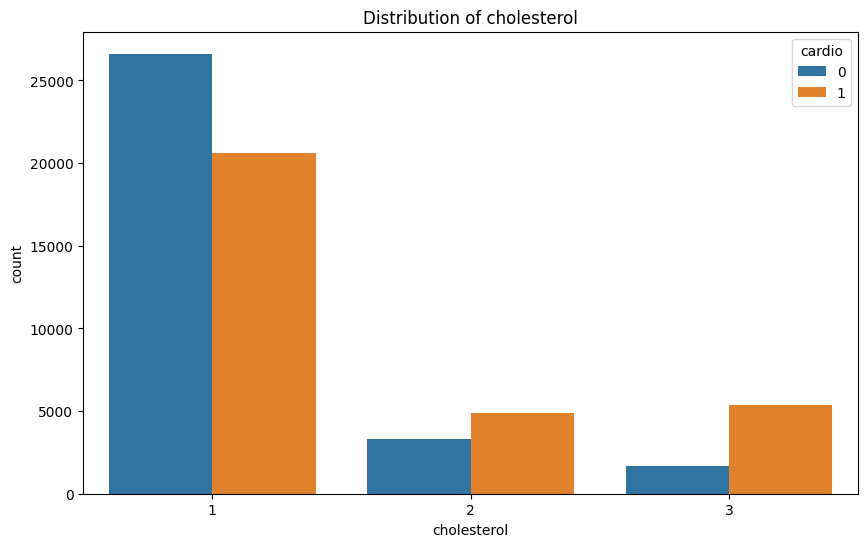

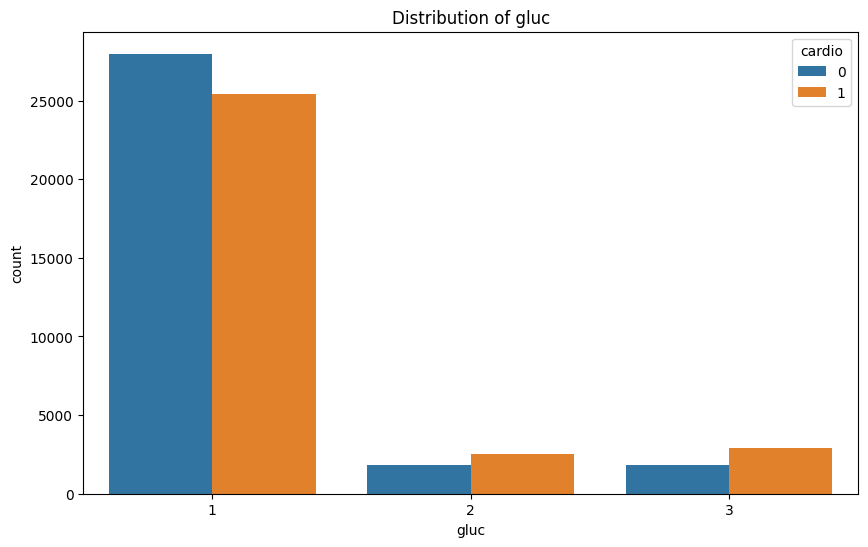

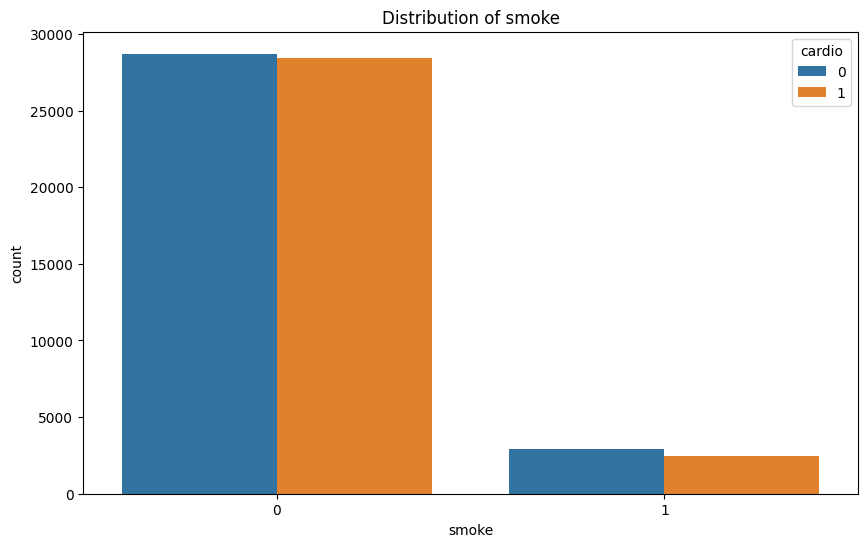

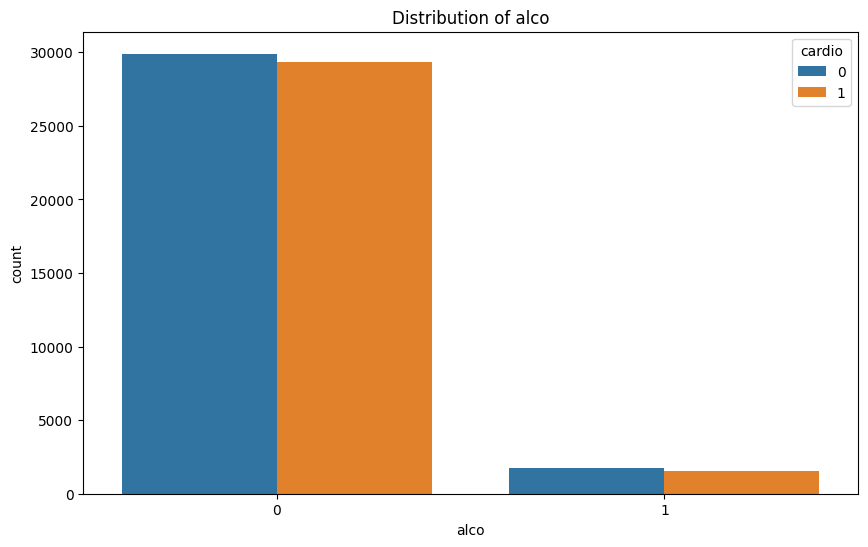

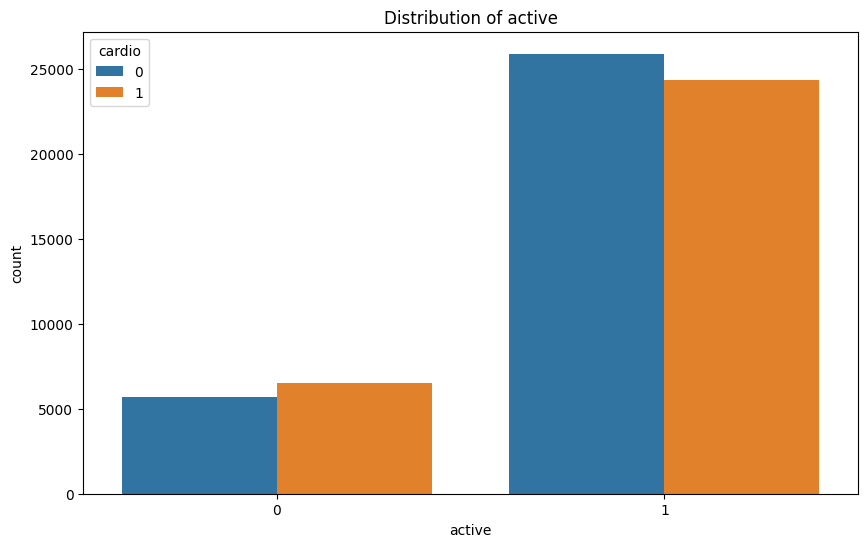

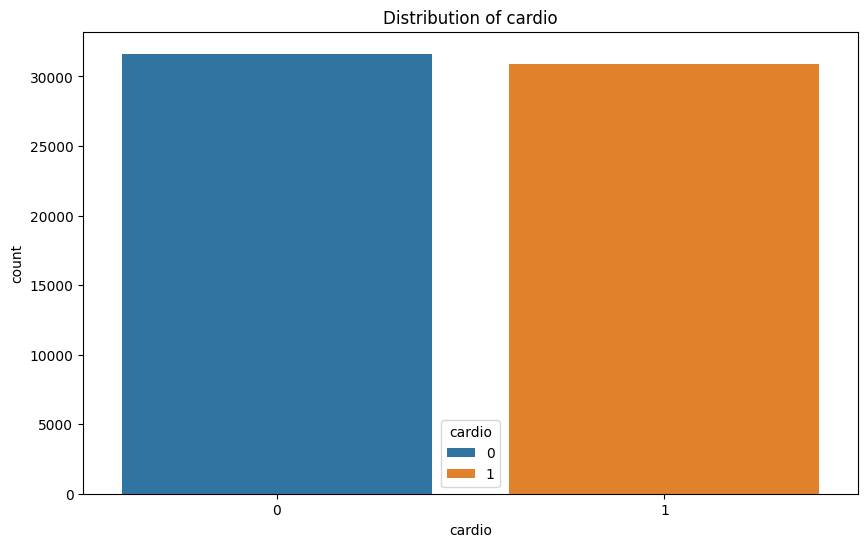

In [ ]:
# Create bar plots for categorical features

categorical_features = data.columns[data.nunique()<10] #Segment features with less than 10 unique features into Categorical subset
for feature in categorical_features:
    plt.figure(figsize=(10, 6)) # Specify the figure size for the plot
    sns.countplot(x=feature,hue="cardio", data=data) # Create a count plot for every categorical feature with a hue of 'cardio' for comparison across classes
    plt.title(f"Distribution of {feature}") #Set title
    plt.show() #Display countplot

From the EDA above, we can see that for individuals with normal glucose levels (glucose reading of 1), there is a higher count of people with negative CVD issues. But as the glucose values go to 2 (above normal) and 3 (well above normal), we see there ar more individuals with CVD incidence.

A [Mendelian Randomization (MR) study](https://www.ahajournals.org/doi/full/10.1161/CIRCGEN.119.002814#d1e831) by Susanna C. Larsson et al found that "Alcohol consumption instrumented by the full set of SNPs (n=94) was positively associated with systolic and diastolic blood pressure"

This indicates a likely linear relationship between alcohol and systolic and diabolic pressure. However, a visual representation of systolic pressure (ap_hi) and alcohol-- via a seaborn jointplot below-- reveals a non-linear or uncorrelated relationship.

The reason for this deviation could be that the alcohol feature was subjective (delivered without substantiating by the patient). This could possibly introduce some inaccurate figures.

Similarly, for subjective features like physical activity, smoke,alcohol intake, a seaborn countplot (with hue set to the cardio target feature showed no significant deviation across binary features with cardio. For example, for the smoke feature, individuals who smoked and those who didn't have significant deviations in cardiovascular disease incidence. This betrays existing science.
Once again, this could be possibly attributed to these binary features largely being subjective.

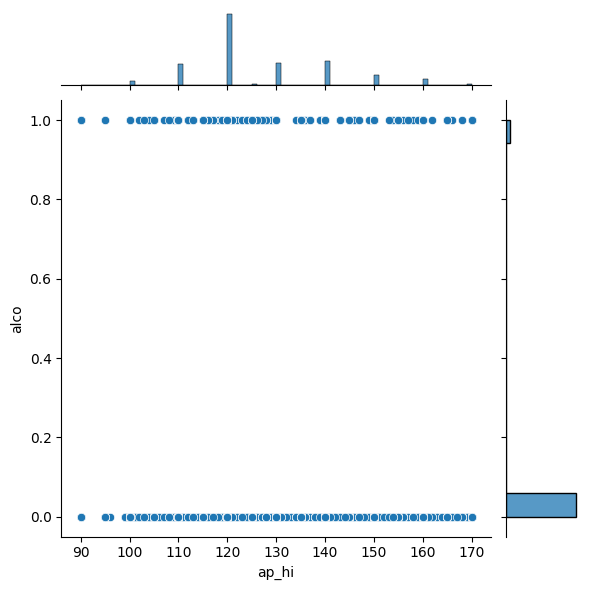

In [ ]:
# Create a joint plot visualizing the relationship between 'ap_hi' (systolic blood pressure) and 'alco' (alcohol) in the CVD dataset
sns.jointplot(data=data,x="ap_hi",y="alco")

### Bivariate Analysis

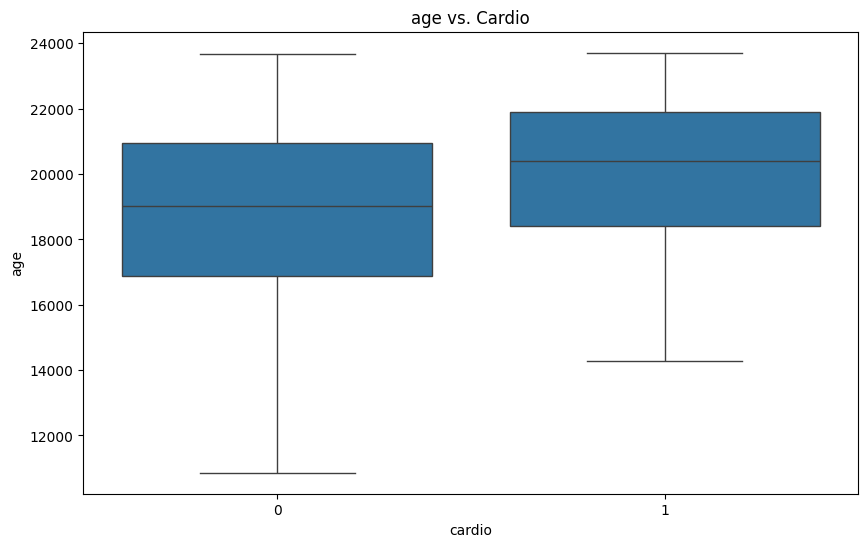

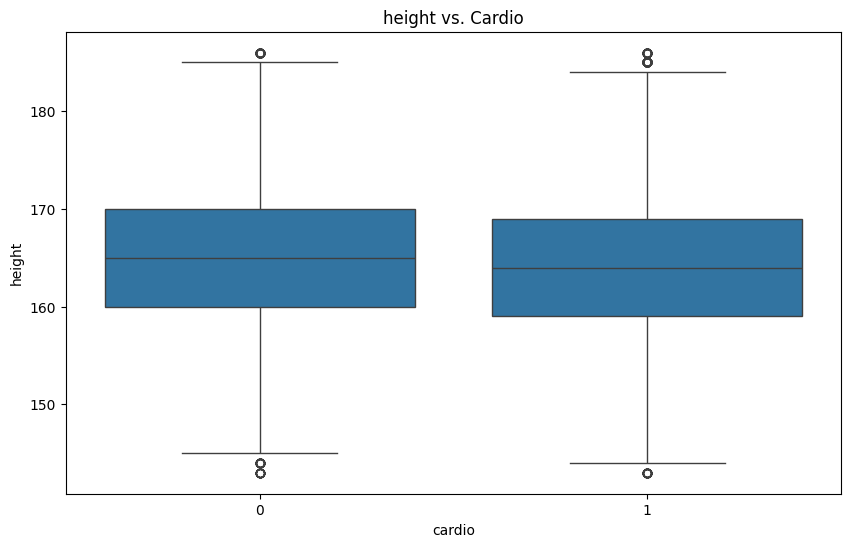

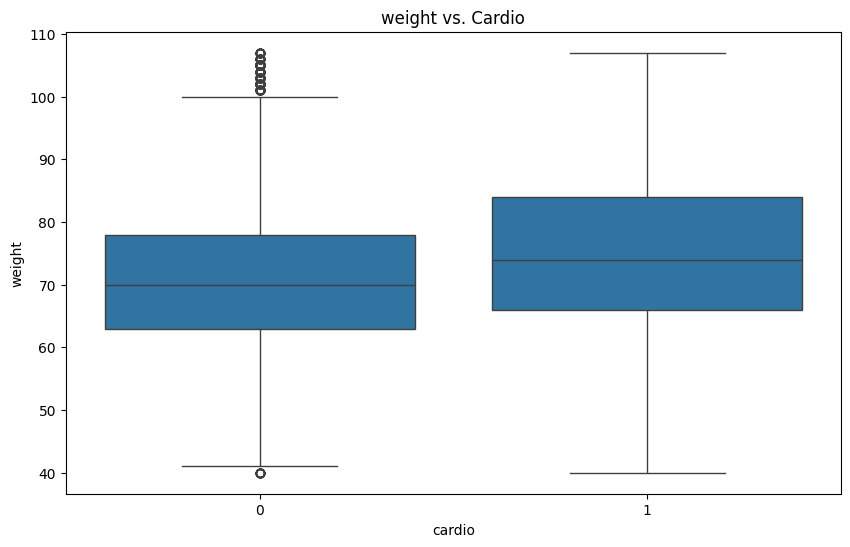

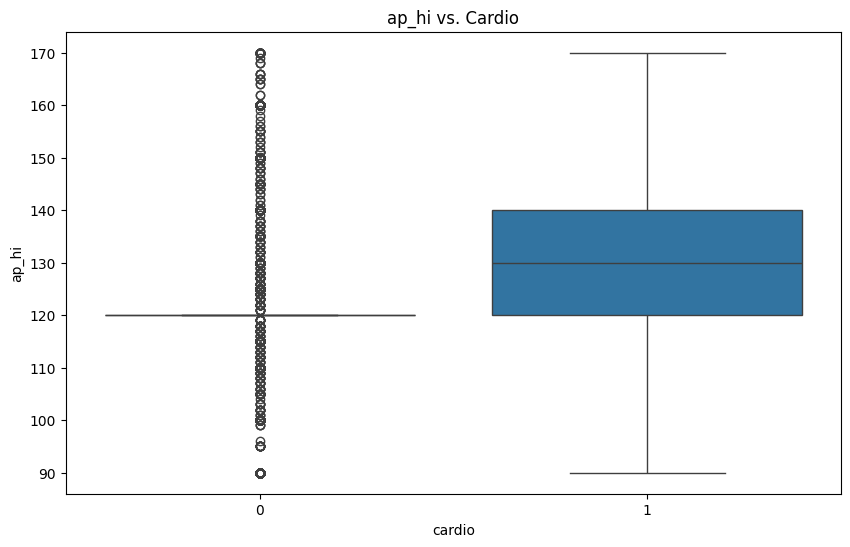

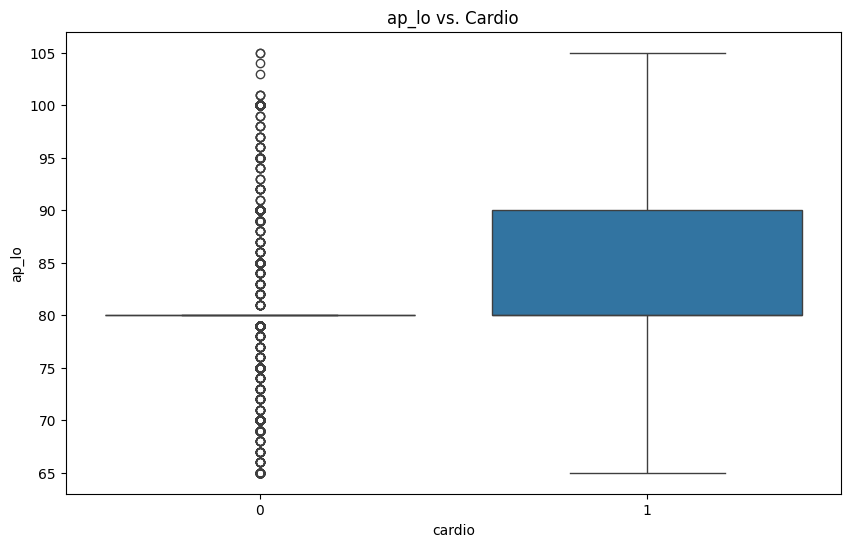

In [ ]:
# Box plots for continuous features vs. cardio
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="cardio", y=feature, data=data)
    plt.title(f"{feature} vs. Cardio")
    plt.show()

The boxplots above revealed the following insights:

1.Older people wre likelier to be diagnosed with CVD -- meaning the risk of CVD increases with age.

This aligns with information from [Clinical Knowledge Summaries](https://cks.nice.org.uk/topics/cvd-risk-assessment-management/background-information/risk-factors-for-cvd/), CVD is strongly age-dependent, primarily affecting people aged over 50 years. The older a person is, the greater the risk of developing CVD.

2.Height was not a significant determinator of CVD occurence

3.Weightier people are at higher risk of CVD incidence. According to the [NHS](https://www.nhs.uk/conditions/cardiovascular-disease/), "one is an increased risk of CVD if their body mass index (BMI) is 25 or above – use the BMI healthy weight calculator to work out your BMI"

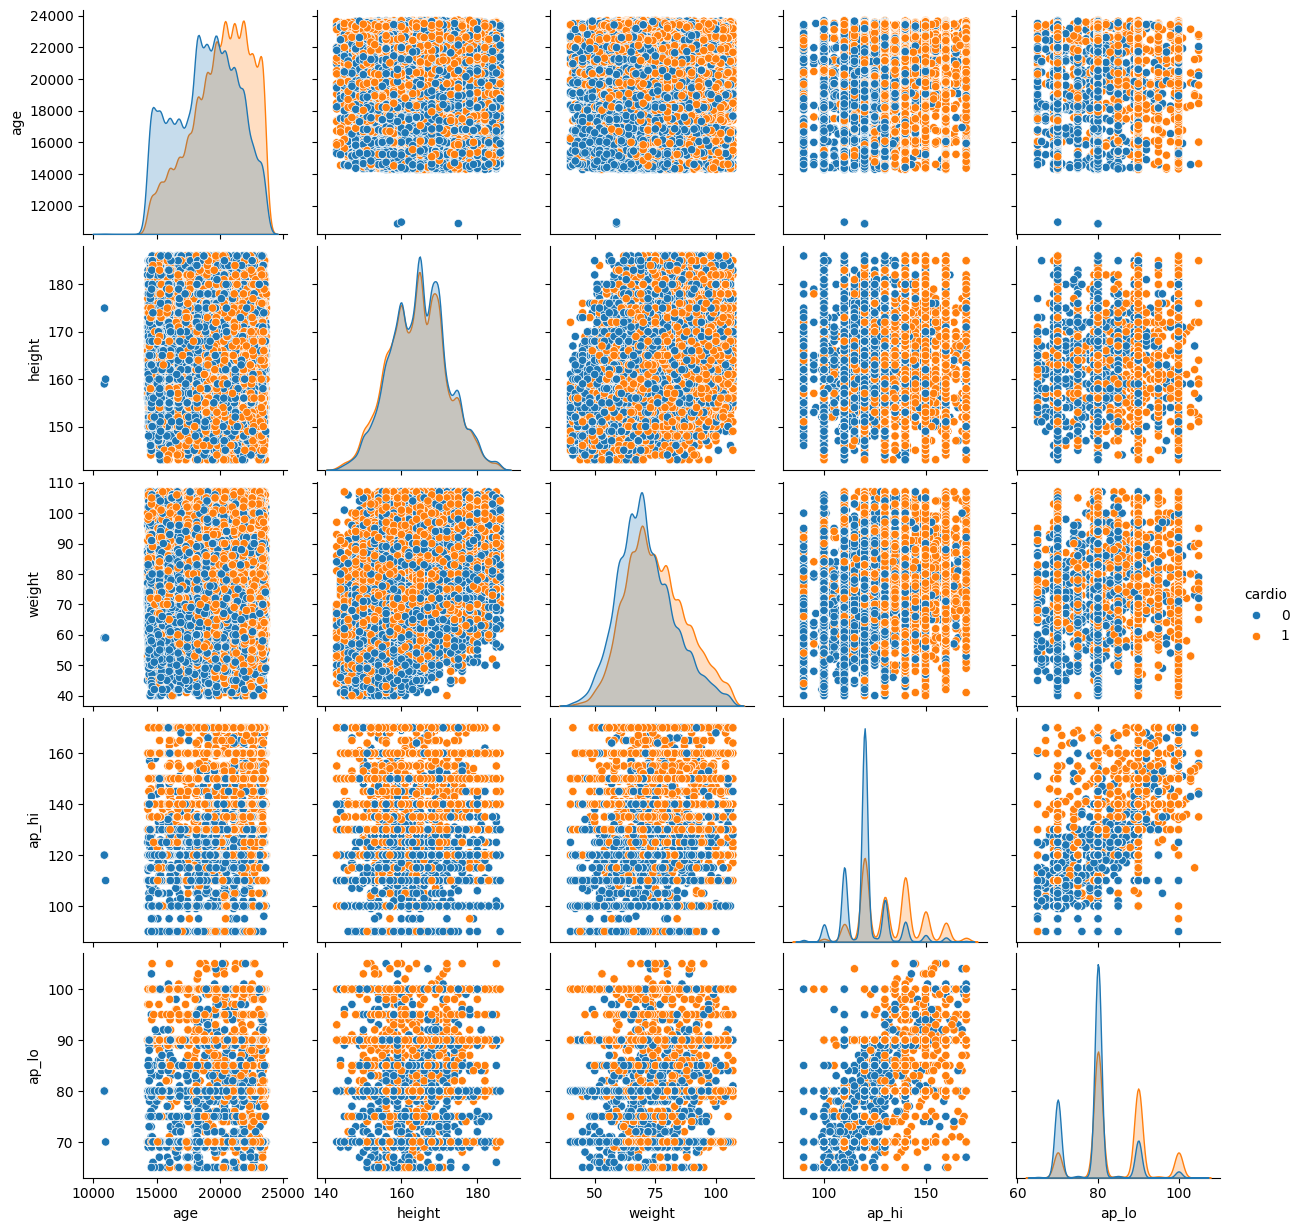

In [ ]:
# Scatter plots for pairs of continuous features
sns.pairplot(data, hue='cardio', vars=continuous_features)
plt.show()

## **Feature Selection and Engineering**

In [ ]:
#First, we need to convert age from days into years

#Note that we since we don't want our age column having fractional values, we would leverage floor division

#instead of the typical floating-point division of "/"
data["age"]=data["age"]//365

To aid model performance, we will dive further into the cardiovascular space and engineer some features. Some of the features we will engineer include:

I.Blood Pressure Levels

II.Mean Arterial Pressure (MAP)

III.Body Mass Index (BMI)

IV.Pulse Pressure

V.Physical Inactivity Risk

VI.Cholesterol and Glucose Combined Risk

#### Blood Pressure Levels

Categorizing blood pressure can be helpful in identifying hypertension stages, which are critical risk factors for cardiovascular disease. According to the [American Heart Association and the WHO](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings), there are four crucial blood pressure levels determined by systolic and diastolic bloood pressure readings.

These are normal, elevated, high blood pressure (hypertension) stage 1,high blood pressure (hypertension) stage 2 and higher hypertensive crisis.

I engineered this blood pressure level feature as given below.

In [ ]:
def bp_levels(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 0 #normal
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return 1 #elevated
    elif 130 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 2 #high blood pressure (hypertension) stage 1
    elif ap_hi >= 140 or ap_lo >= 90:
        return 3 #high blood pressure (hypertension) stage 2
    else:
        return 4 #higher hypertensive crisis

data["bp_levels"] = data.apply(lambda row: bp_levels(row['ap_hi'], row['ap_lo']), axis=1)

#### Body Mass Index

According to a [BMJ study by Yu Chen et al](https://www.bmj.com/content/347/bmj.f5446#:~:text=Principal%20findings%20of%20the%20study&text=An%20increased%20risk%20of%20death%20was%20observed%20in%20all%20BMI,than%2017.5%20for%20overall%20CVD.),
"1.1 million participants, we observed a U shaped association between BMI and risk of death from CVD in east Asians. An increased risk of death was observed in all BMI values greater than 24.9 for overall CVD, CHD, and ischaemic stroke, and values greater than 27.4 for overall stroke and haemorrhagic stroke, as well as values lower than 17.5 for overall CVD. "

This shows an notable relationship between BMI and CVD occurence. The models used in this report could gain enhanced interpretability with a BMI feature accordingly engineered

In [ ]:
# Body Mass Index (BMI)
data['bmi'] = data['weight'] / (data['height'] / 100) ** 2

#### Pulse Pressure

Pulse Pressure (PP) is essentially the difference between systolic and diastolic blood pressure.

A [Brisighella Heart Study (BHS) by A. Dormi et al](https://academic.oup.com/ajh/article/13/S2/268A/186584) revealed the role of pulse pressure as an independent risk factor for cardiovascular disease.

Therefore, models can gain from this engineered feature.

In [ ]:
# Pulse Pressure
data['pulse_pressure'] = data['ap_hi'] - data['ap_lo']

#### Mean Arterial Pressure (MAP)

The mean arterial pressure (MAP) is the average arterial pressure throughout one cardiac cycle, systole, and diastole [DeMers D et al ](https://www.ncbi.nlm.nih.gov/books/NBK538226/).

Consistently high MAP increases the workload on the heart. This has the potential of triggering hypertrophy and heart failure. MAP has been strongly linked with CVD incidence and hospitalization [Dahai Yu](https://pubmed.ncbi.nlm.nih.gov/19470869/)

This feature was conseqentially engineered.

In [ ]:
# Mean Arterial Pressure (MAP)
data['MAP'] = ((2 * data['ap_lo']) + data['ap_hi']) / 3

#### Other engineered features

I explored the possibility of combining cholesterol and glucose levels into a single feature. This aims to capture the metabolic syndrome risk, which is a notable marker of cardiovascular diseases.

Physical inactivity was also engineered. Physical inactivity is a significant risk factor for cardiovascular diseases.A binary feature for physical inactivity was consequently created aiming to assess this risk.

In [ ]:
# Combining Glucose and Cholesterol risk

def chol_gluc(chol, gluc):
    if chol == 1 and gluc == 1:
        return 0 #normal
    elif chol == 3 or gluc == 3:
        return 2 #high
    else:
        return 1  #moderate
data['chol_gluc_risk'] = data.apply(lambda row: chol_gluc(row['cholesterol'], row['gluc']), axis=1)

# Engineering the Physical Inactivity Risk feature

data['physical_inactivity_risk'] = 1 - data['active']

### Converting Continuous features to Categorical equivalents

When working on a classification task, converting numerical features to categorical features has the following advantages

*   Model Interpretability:Having categorical bands makes it easier to explain model behavior as compared to a continuous spectrum
*   Compared to continous values, categorical features makes the model less sensitive to outliers
*   When relationships between numerical features and target features are non-linear, categorizing such features can better help model discover patterns   

To determine which of these continuous features to convert to categorical equivalents, let us first examine their linear/non-linear relationships with the target cardio feature.

We would confirm this with their correlation values with the target feature.

Should they have a significantly linear relationship, we could have to normalize such features instead of converting to categorical features.

In [ ]:
# We have already identified the numerical features in the dataset as continuous_features
print(continuous_features)

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')


However, we have engineered some new continuous features, so let us update our continuous_features variable

In [ ]:
continuous_features = data.columns[data.nunique() > 20].tolist()

In [ ]:
#displaying continuous feature
print(continuous_features)

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'pulse_pressure', 'MAP']


In [ ]:
target = 'cardio'

# Create a segment of the DataFrame with continuous features and the Cardio target
data_subset = data[continuous_features + [target]]

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Extracting the correlation of continuous features with the target cardio attribute

correlation_with_target = correlation_matrix[target].drop(target)  # Dropping the target's correlation with itself

# Display the correlation values

print("Correlation with target (cardio):")
print(correlation_with_target)


Correlation with target (cardio):
age               0.236420
height           -0.027595
weight            0.161767
ap_hi             0.432232
ap_lo             0.336295
bmi               0.178974
pulse_pressure    0.345495
MAP               0.414205
Name: cardio, dtype: float64


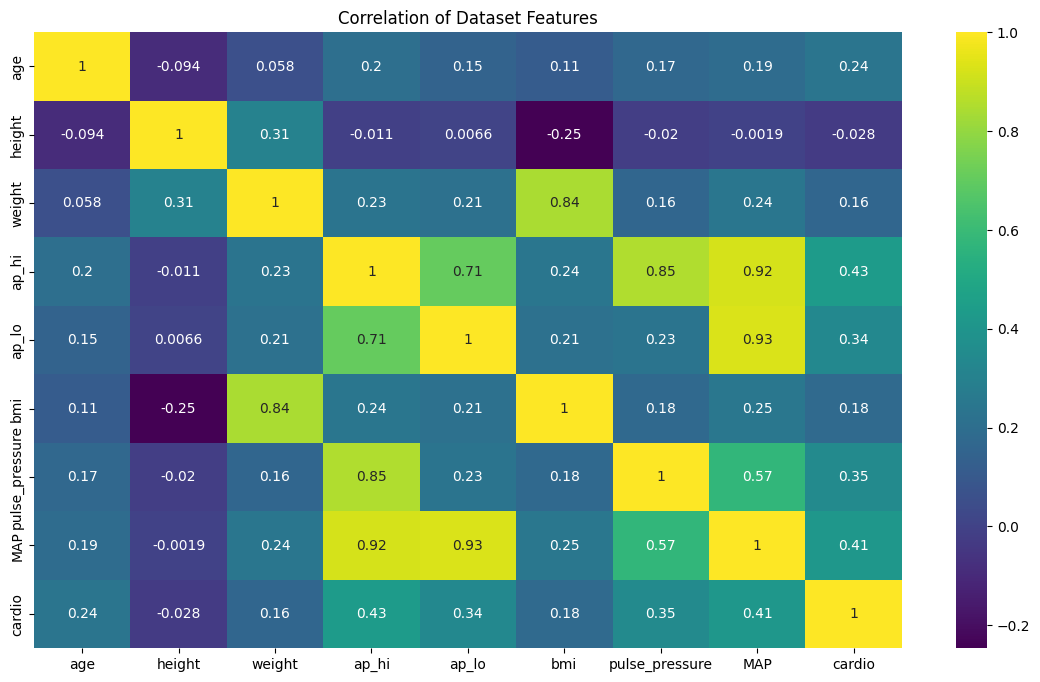

In [ ]:
#Visualizing correlation between continuous feature and target Cardio feature

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix,cmap="viridis",annot=True)
plt.title('Correlation of Dataset Features')
plt.show()

The above scatterplot shows a significantly a fairly linear relationship between continuous features (like ap_lo and ap_hi) vs cardio  label.

This linear relationship could invalidate the need for standardizing these features, making them suitable for conversion to categorical values for better model performance.

Therefore, let us visually confirm if there is a linear relationship between the said features

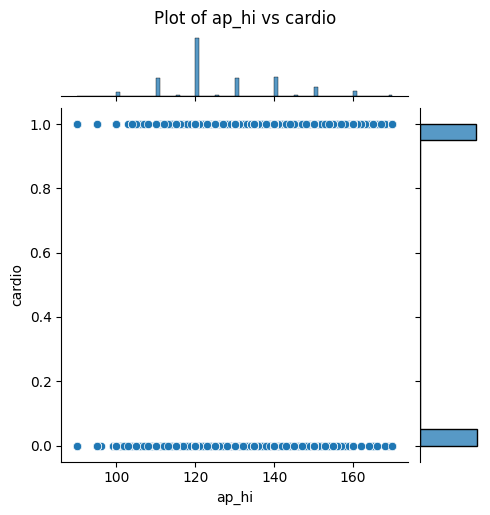

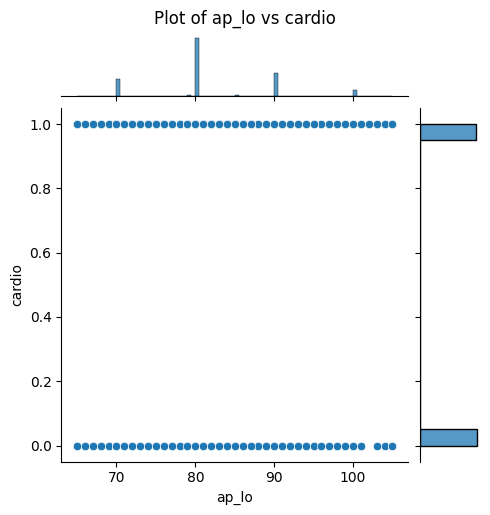

In [ ]:
for i in ["ap_hi", "ap_lo"]:
    # Create the jointplot
    g = sns.jointplot(data=data, x=i, y="cardio",height=5)

    # Set the title
    g.fig.suptitle(f"Plot of {i} vs cardio", y=1.02)  # y parameter adjusts title position

    # Show the plot
    plt.show()


The jointplot between these features doesn't show a clear linear relationship between these numeric features and the cardio target variable. Clearly, the data points are concentrated in horizontal bands at cardio values of 1 and 0.

There is no clear trend or correlation between the the x-axis values (ap_hi and ap_lo) and the cardio outcome.

Therefore, we can proceed to converting these features--along with height,weight, and bmi--to categorical bins.

For relevancy, we would start our bins from a range that include the minimum value for each feature and end it at the maximum value. Following this approach ensures that all data points in our dataset are covered and that bins are meaningful.

This has the added advantage of simplicity and interpretability (regarding capturing the context of the data)

In [ ]:
#Determining minimum and max of concerned features
to_bins=["age","height","weight","ap_hi","ap_lo","bmi"]
for i in to_bins:
    print(f"Mininum value of {i} is {data[i].min()} and maximum value is {data[i].max()}")

Mininum value of age is 29 and maximum value is 64
Mininum value of height is 143 and maximum value is 186
Mininum value of weight is 40.0 and maximum value is 107.0
Mininum value of ap_hi is 90 and maximum value is 170
Mininum value of ap_lo is 65 and maximum value is 105
Mininum value of bmi is 13.520822065981614 and maximum value is 50.89179548156956


In [ ]:
#Converting age to age_bin

age_bins = list(range(20, 80, 10))
age_labels = list(range(len(age_bins) - 1))

data['age_bins'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

print(data[['age', 'age_bins']].head())

   age age_bins
0   50        3
1   55        3
2   51        3
3   48        2
5   60        4


In [ ]:
#Converting height to height_bin

height_bins = list(range(140, 191, 5))
height_labels = list(range(len(height_bins) - 1))

data['height_bins'] = pd.cut(data['height'], bins=height_bins, labels=height_labels, right=False)

# Display the binning results
print(data[['height', 'height_bins']].head())


   height height_bins
0     168           5
1     156           3
2     165           5
3     169           5
5     151           2


In [ ]:
#Converting weight to weight_bin

weight_bins = list(range(30, 120, 10))

weight_labels = list(range(len(weight_bins) - 1))

data['weight_bins'] = pd.cut(data['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Display the binning results
print(data[['weight', 'weight_bins']].head())


   weight weight_bins
0    62.0           3
1    85.0           5
2    64.0           3
3    82.0           5
5    67.0           3


In [ ]:
#Determining minimum and max of concerned features
to_bins=["age","height","weight","ap_hi","ap_lo","bmi"]
for i in to_bins:
    print(f"Mininum value of {i} is {data[i].min()} and maximum value is {data[i].max()}")

Mininum value of age is 29 and maximum value is 64
Mininum value of height is 143 and maximum value is 186
Mininum value of weight is 40.0 and maximum value is 107.0
Mininum value of ap_hi is 90 and maximum value is 170
Mininum value of ap_lo is 65 and maximum value is 105
Mininum value of bmi is 13.520822065981614 and maximum value is 50.89179548156956


In [ ]:
#Converting ap_hi to ap_hi_bins

ap_hi_bins = list(range(80, 190, 10))
ap_hi_labels = list(range(len(ap_hi_bins) - 1))

data['ap_hi_bins'] = pd.cut(data['ap_hi'], bins=ap_hi_bins, labels=ap_hi_labels, right=False)

# Display the binning results
print(data[['ap_hi', 'ap_hi_bins']].head())

   ap_hi ap_hi_bins
0    110          3
1    140          6
2    130          5
3    150          7
5    120          4


In [ ]:
#Converting ap_lo to ap_lo_bins

ap_lo_bins = list(range(60, 120, 10))
ap_lo_labels = list(range(len(ap_lo_bins) - 1))

data['ap_lo_bins'] = pd.cut(data['ap_lo'], bins=ap_lo_bins, labels=ap_lo_labels, right=False)

# Display the binning results
print(data[['ap_lo', 'ap_lo_bins']].head())

   ap_lo ap_lo_bins
0     80          2
1     90          3
2     70          1
3    100          4
5     80          2


In [ ]:
#Converting bmi to bmi_bins

bmi_bins = list(range(10, 65, 5))
bmi_labels = list(range(len(bmi_bins) - 1))

data['bmi_bins'] = pd.cut(data['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Display the binning results
print(data[['bmi', 'bmi_bins']].head())

         bmi bmi_bins
0  21.967120        2
1  34.927679        4
2  23.507805        2
3  28.710479        3
5  29.384676        3


In [ ]:
data["pulse_pressure"].min(),data["pulse_pressure"].max()

(-10, 103)

In [ ]:
list(range(-15,120,10))

[-15, -5, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115]

In [ ]:
data["MAP"].min(),data["MAP"].max(),

(73.33333333333333, 126.0)

In [ ]:
#Converting MAP to map_bins

map_bins = list(range(65, 150, 10))
map_labels = list(range(len(map_bins) - 1))

data['map_bins'] = pd.cut(data['MAP'], bins=map_bins, labels=map_labels, right=False)

# Display the binning results
print(data[['MAP', 'map_bins']].head())

          MAP map_bins
0   90.000000        2
1  106.666667        4
2   90.000000        2
3  116.666667        5
5   93.333333        2


In [ ]:
#Converting pulse_pressure to pp_bins

pp_bins = list(range(-15,120,10))
pp_labels = list(range(len(pp_bins) - 1))

data['pp_bins'] = pd.cut(data['pulse_pressure'], bins=pp_bins, labels=pp_labels, right=False)

# Display the binning results
print(data[['pulse_pressure', 'pp_bins']].head())

   pulse_pressure pp_bins
0              30       4
1              50       6
2              60       7
3              50       6
5              40       5


In [ ]:
data.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
5   60       1     151    67.0    120     80            2     2      0     0   

   ...  chol_gluc_risk  physical_inactivity_risk  age_bins  height_bins  \
0  ...               0                         0         3            5   
1  ...               2                         0         3            3   
2  ...               2                         1         3            5   
3  ...               0                         0         2            5   
5  ...               1                         1         4            2   

   weight_bins  ap_hi_bins  ap_lo_bins  bmi_bins map_bins pp_bins  
0            3           3           2         2        2       4  
1            5           6           3         4        4       6  
2            3           5           1         2        2       7  
3            5           7           4         3        5       6  
5            3           4           2         3        2       5  

[5 rows x 26 columns]

[Studies](https://link.springer.com/article/10.1007/s12471-010-0841-y) have shown significant deviation between CVD incidence in men vs women, suggesting the possibility of gender being a fundamental discriminator in the incidence of CVD in an individual.

This would necessitate us splitting our dataset into a male and female subgroups to better help our model discover the nuanced patterns in the data.

However, the countplot for the gender feature (with a 'cardio' hue) --as seen below-- showed no significant deviations between CVD occurence in male and female. This suggests for that our dataset, our model may not necessarily improve with splitting the data.

<Axes: xlabel='gender', ylabel='count'>

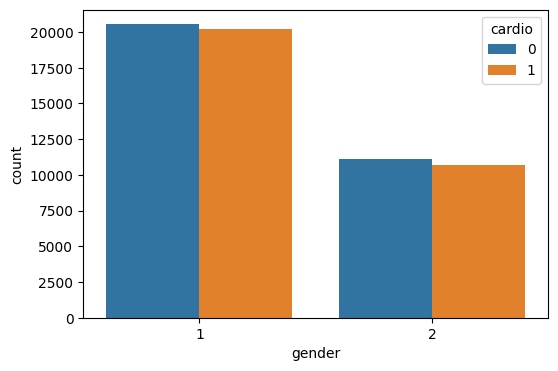

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=data,hue="cardio",x="gender")

To check the statistical importance of the gender variable to our model performance (by checking its relationship with the cardio train), let us conducut a chi-square test

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['cardio'])
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a statistically significant association between gender and cardiovascular disease (reject H0).")
else:
    print("There is no statistically significant association between gender and cardiovascular disease (fail to reject H0).")

cardio      0      1
gender              
1       20537  20181
2       11098  10689
Chi-square statistic: 1.4079202696731035
P-value: 0.23540194730650146
There is no statistically significant association between gender and cardiovascular disease (fail to reject H0).


The chi-square test score reveals no significant association between gender and CVD. However, we will dive further by examining a performance check between having a model (herein Logistic Regression) to see if there would be significant model improvements if we used a combined data of male and female -- and if we split our data along gender lines

By following this experimentation approach,training and evaluating both combined and gender-specific models,an evidentially substantiated decision could be better reached on which approach yields superior performance. Next, are the performance metrics model performance would be measured on.

## **Logistic Regression Model**

#### Running a Logistic Regression Model with combined data

In [ ]:
X = data.drop(['cardio'], axis=1)
y = data['cardio']

# Train-test split leveraging Sklearn's hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# Training logistic regression model

model_combined = LogisticRegression(max_iter=1000, random_state=42)
model_combined.fit(X_train, y_train)


# Evaluate the model
y_pred_combined = model_combined.predict(X_test)

print("Combined Model Performance:")

print(classification_report(y_test, y_pred_combined))

print("AUC-ROC:", roc_auc_score(y_test, y_pred_combined))

Combined Model Performance:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6327
           1       0.75      0.65      0.70      6174

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501

AUC-ROC: 0.7200468075870868


#### Running a Logistic Regression Model with data split into male and female datasets (along gender lines)

In [ ]:
# Separate datasets by gender
data_male = data[data['gender'] == 1] # Filter the dataset for male entries
data_female = data[data['gender'] == 2] # Filter the dataset for female entries

# Function to train and evaluate model
def train_and_evaluate(data, gender_label):
    X = data.drop(['cardio'], axis=1) # Create X features by dropping the target column 'cardio'
    y = data['cardio']  # Define the target variable (y)

    # Split the data into training and test sets with stratification to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Instantiate and train the Logistic Regression model with maximum number of iterations set to 1000
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    #Predict with the Logistic model on test data
    y_pred = model.predict(X_test)
    print(f"{gender_label} Model Performance:") # Print the performance of both gender-based models
    print(classification_report(y_test, y_pred)) # Print the classification report for each model
    print("AUC-ROC:", roc_auc_score(y_test, y_pred)) # Print the AUC-ROC score for each model

# Train and evaluate male model
train_and_evaluate(data_male, 'Male')

# Train and evaluate female model
train_and_evaluate(data_female, 'Female')


Male Model Performance:
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      4108
           1       0.75      0.67      0.71      4036

    accuracy                           0.73      8144
   macro avg       0.73      0.73      0.72      8144
weighted avg       0.73      0.73      0.73      8144

AUC-ROC: 0.72564929268521
Female Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2220
           1       0.75      0.68      0.71      2138

    accuracy                           0.73      4358
   macro avg       0.74      0.73      0.73      4358
weighted avg       0.74      0.73      0.73      4358

AUC-ROC: 0.732570432921228


#### Comparing model performance

##### Recall for Class 0 (Absence of CVD):

The combined model delivered a the same recall (0.79) compared to both male and female models (0.79).

###### Recall for Class 1 (Presence of CVD):

The male and female models both have a higher recall (0.68 for the female and 0.66 for the male model) compared to the combined model (0.65). This is a slight improvement in identifying true positives.


##### Accuracy:

The accuracy is remarkably similar across all models. Specifically, the combined model returned 0.72 while the female and male model returned an accuracy of 0.72.


###### AUC-ROC:

The combined model has an AUC-ROC of 0.7203
The male model has a slightly higher AUC-ROC of 0.7250.
The female model has the highest AUC-ROC at 0.7326 (approximately).

##### Conclusion and Recommendation

Improvement in Class 1 Recall and AUC-ROC: Admittedly, the separate models for males and females returned slightly improved performance in recall for class 1 and a higher AUC-ROC compared to the combined model.

Theoretically, this implies that the models are better at distinguishing between the classes when datasets are splintered across gender lines.

However, in light of practical considerations,the improvements, while present, are not dramatically different. The results showed that gendered data was not really a game changer to model performance.

The choice to use separate models should consider the added complexity and maintenance in light of the performance gain (remarkably small margins, in this instance).

Given the very slim improvements in recall and AUC-ROC, using separate models for males and females may not be justified in light of the complexities involved.

##### Testing Logistic Regression Performance with variations of dataset

In [ ]:
data.head(2)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   

   ...  chol_gluc_risk  physical_inactivity_risk  age_bins  height_bins  \
0  ...               0                         0         3            5   
1  ...               2                         0         3            3   

   weight_bins  ap_hi_bins  ap_lo_bins  bmi_bins map_bins pp_bins  
0            3           3           2         2        2       4  
1            5           6           3         4        4       6  

[2 rows x 26 columns]

In [ ]:
#Creating dataset copy with solely categorical bins

data_bins=data.copy()

In [ ]:
data_bins.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   

   ...  chol_gluc_risk  physical_inactivity_risk  age_bins  height_bins  \
0  ...               0                         0         3            5   
1  ...               2                         0         3            3   
2  ...               2                         1         3            5   

   weight_bins  ap_hi_bins  ap_lo_bins  bmi_bins map_bins pp_bins  
0            3           3           2         2        2       4  
1            5           6           3         4        4       6  
2            3           5           1         2        2       7  

[3 rows x 26 columns]

<Axes: >

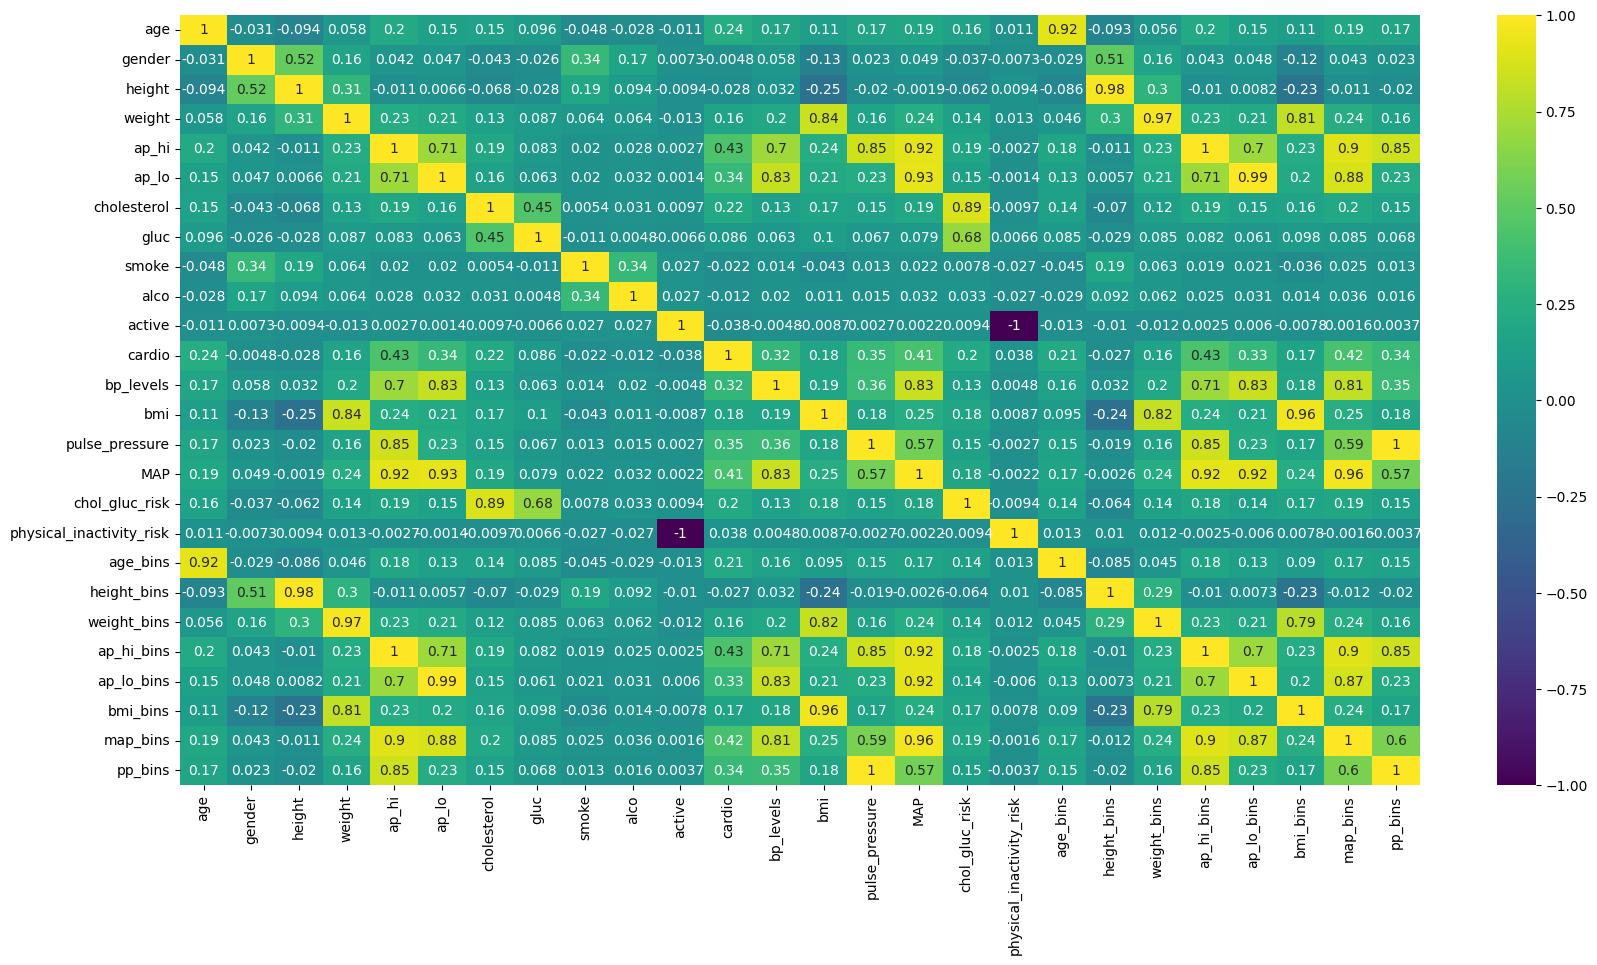

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_bins.corr(),annot=True,cmap="viridis")

From the heatmap above, we can see several cases of multicollinearity between the independent features. For example,age has a 0.92 correlation with its age_bin engineered categorical bin feature.

The same goes for the weight feature and the weight_bin feature (herein a 0.97) correlation.

Multicollinearity negatively affects the efficiency of the maximum likelihood estimator (MLE) in both the linear and generalized linear models. [Lukman, A.F. et al](https://www.mdpi.com/2227-7390/11/2/340)

Logistic Regression relies strongly on estimating the relationship between independent variables and the binary outcome. A dataset with notable ulticollinearity can suffer reductions in the precision of the estimated coefficients.

Consequently, this diminishes the model's statistical power, introducing unreliability in the p-values to identify independent variables that are statistically significant.

Specifically, multicollinearity could trigger instability in these estimates. This could result in significant standard errors and unreliable coefficient values. which can distort the model's predictions and interpretations.

Therefore, there could be the need to tackle multicollinearity in the dataset by removing numerical features from which categorical bin features were engineered.


In [ ]:
#drop features for which there is a categorical bin equivalent

data_bins= data_bins.drop(["age","weight","height","ap_hi","ap_lo","bmi","pulse_pressure","MAP"], axis = 1)

In [ ]:
data_bins.head()

gender  cholesterol  gluc  smoke  alco  active  cardio  bp_levels  \
0       2            1     1      0     0       1       0          2   
1       1            3     1      0     0       1       1          3   
2       1            3     1      0     0       0       1          2   
3       2            1     1      0     0       1       1          3   
5       1            2     2      0     0       0       0          2   

   chol_gluc_risk  physical_inactivity_risk age_bins height_bins weight_bins  \
0               0                         0        3           5           3   
1               2                         0        3           3           5   
2               2                         1        3           5           3   
3               0                         0        2           5           5   
5               1                         1        4           2           3   

  ap_hi_bins ap_lo_bins bmi_bins map_bins pp_bins  
0          3          2        2        2       4  
1          6          3        4        4       6  
2          5          1        2        2       7  
3          7          4        3        5       6  
5          4          2        3        2       5

The dataset now only contains categorical values with no numeric features. The original features from which binned features were created have been removed

**Testing Logistic Model with Data bins (only binned categorical data)**

In [ ]:
X = data_bins.drop(['cardio'], axis=1)
y = data_bins['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# Training logistic regression model

model_binned = LogisticRegression(max_iter=1000, random_state=42)
model_binned.fit(X_train, y_train)


# Evaluate the model
y_pred_binned = model_binned.predict(X_test)

print("Binned Model Performance:")

print(classification_report(y_test, y_pred_binned))

print("AUC-ROC:", roc_auc_score(y_test, y_pred_binned))

Binned Model Performance:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6327
           1       0.75      0.65      0.70      6174

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501

AUC-ROC: 0.7193813039677701


#### Comparing results between logistic Regression model trained on binned data (with reduced multicollinearity) and dataset with dataset with significant multicollinearity

Interestingly, the difference -- between the model trained on binned data (with reduced multicollinearity) and the model trained on dataset with dataset with significant multicollinearity -- were not drastically different.

### Hyperparameter Tuning for Logistic Regression

"In machine learning, optimization of hyperparameters aims to find the best values of model hyperparameters yielding an optimal model with minimum prediction error. It is the most important step that directly affects the performance of learned model."
[Ahmed H.Arafa et al](https://www.researchgate.net/publication/358043825_Logistic_Regression_Hyperparameter_Optimization_for_Cancer_Classification)

Hyperparameter tuning is particularly important for logistic regression as it helps it in identifying the most befitting regularization strength and type. By also selecting the right penalties, feature selection is improved,upgrading the model's interpretability.

This goes a long way in reducing the chances of the model overfitting or underfitting. Rid of such overfitting and underfitting handicaps, the model can better generalize to unseen data, ultimately improving predictive accuracy and robustness.

In [ ]:
data.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   

   ...  chol_gluc_risk  physical_inactivity_risk  age_bins  height_bins  \
0  ...               0                         0         3            5   
1  ...               2                         0         3            3   
2  ...               2                         1         3            5   

   weight_bins  ap_hi_bins  ap_lo_bins  bmi_bins map_bins pp_bins  
0            3           3           2         2        2       4  
1            5           6           3         4        4       6  
2            3           5           1         2        2       7  

[3 rows x 26 columns]

In [ ]:
#Deriving X and y
X = data.drop(['cardio'], axis=1)
y = data['cardio']

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# Define the parameter grid with valid combinations
log_param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5]}
    # note that l1_ratio is specific to elasticnet
]

# Initializing the logistic regression model

log_model = LogisticRegression(max_iter=1000,random_state=42)

# Initialize GridSearchCV

grid_search = GridSearchCV(estimator=log_model, param_grid=log_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model

grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score from grid search

print("Best Parameters found:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluating the best model on the test set

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters found: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.723622099790021
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6327
           1       0.75      0.65      0.70      6174

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501

AUC-ROC: 0.7200468075870868


## **Support Vector Machines**

In [ ]:
#Checking dataset
data.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
5   60       1     151    67.0    120     80            2     2      0     0   

   ...  chol_gluc_risk  physical_inactivity_risk  age_bins  height_bins  \
0  ...               0                         0         3            5   
1  ...               2                         0         3            3   
2  ...               2                         1         3            5   
3  ...               0                         0         2            5   
5  ...               1                         1         4            2   

   weight_bins  ap_hi_bins  ap_lo_bins  bmi_bins map_bins pp_bins  
0            3           3           2         2        2       4  
1            5           6           3         4        4       6  
2            3           5           1         2        2       7  
3            5           7           4         3        5       6  
5            3           4           2         3        2       5  

[5 rows x 26 columns]

In [ ]:
#Creating training and test dataset for modelling

X,y=data.drop("cardio",axis=1),data["cardio"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

### Implementing Linear SVC with GridSearchCV

In [ ]:
num_features=data.columns[data.nunique()>20].tolist() #creating list of continuous features

In [ ]:
# Define preprocessor for scaling numerical features

preprocessor=ColumnTransformer(transformers=[
    ("scaler",StandardScaler(),num_features)
])

# Initialize Linear Support Vector Classifier

linear_svc=LinearSVC(random_state=42)

# Construct a data-scaling pipeline that also applies PCA, and fits the linear SVC model

pipeline=Pipeline(
    [("scaling",preprocessor),
    ("pca",PCA(n_components=0.96)),
    ("lin_svc",linear_svc) ]
)

# Construct hyparameter grid for GridSearchCV

param_grid = {
    'lin_svc__C': [0.01, 0.1, 1, 10, 100],
    'lin_svc__penalty': ['l2'],  # Ignored'l1' as it is not supported with dual parameter is set to True
    'lin_svc__loss': ['hinge', 'squared_hinge'],
    'lin_svc__dual': [False, True],
    'lin_svc__class_weight': [None, 'balanced']
}

# Initialize GridSearchCV to identify the best hyperparameters

grid_search=GridSearchCV(estimator=pipeline,cv=10,n_jobs=-1,param_grid=param_grid)

# Fit the GridSearchCV to the training data

grid_search.fit(X_train,y_train)

# Predict the test data using the best found model

y_pred=grid_search.predict(X_test)

In [ ]:
# Fetch the best cross-validation score from the grid search

best_val_score=grid_search.best_score_

# Evaluate the accuracy on the test set

accuracy=accuracy_score(y_test,y_pred)

# Print the best cross-validation score and test set accuracy

print(f"Best Cross Validation score is {best_val_score:.2f}")
print(f"Accuracy of linear SVC model is {accuracy:.2f}")

Best Cross Validation score is 0.72
Accuracy of linear SVC model is 0.72


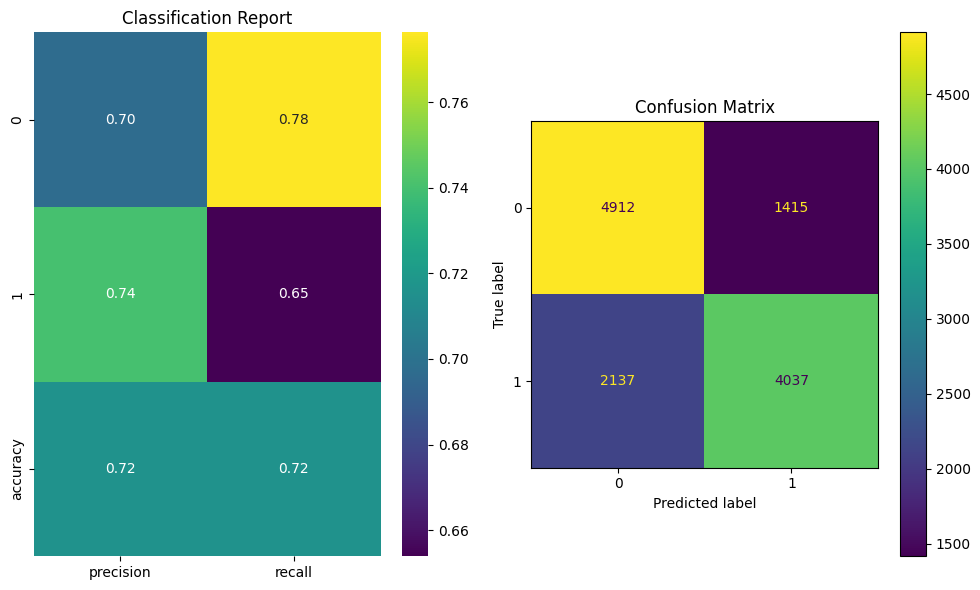

In [ ]:
#Evaluating Linear SVC performance from Grid Search
report=classification_report(y_test,y_pred,output_dict=True)
report=pd.DataFrame(report).transpose()
cm=confusion_matrix(y_test,y_pred)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot classification report heatmap
sns.heatmap(report.iloc[:-2, :-2], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])

ax[0].set_title("Classification Report")

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
ax[1].set_title("Confusion Matrix")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


From the performance of the linear SVC above, it is highly probable that the dataset is not linearly separable. Specifically, the validation accuracy of 0.72 and the confusion matrix are strong indicators of the dataset being not perfectly linearly separable.

Furthermore, the relatively high number of misclassifications (1415 false positives and 2137 false negatives) indicates that a linear decision boundary is not perfectly appropriately for separating the binary classes of the cardio feature.

The linear inseparably of the dataset will be further demonstrated with visualization and a Linear Programming Problem Test

### PCA Visualization

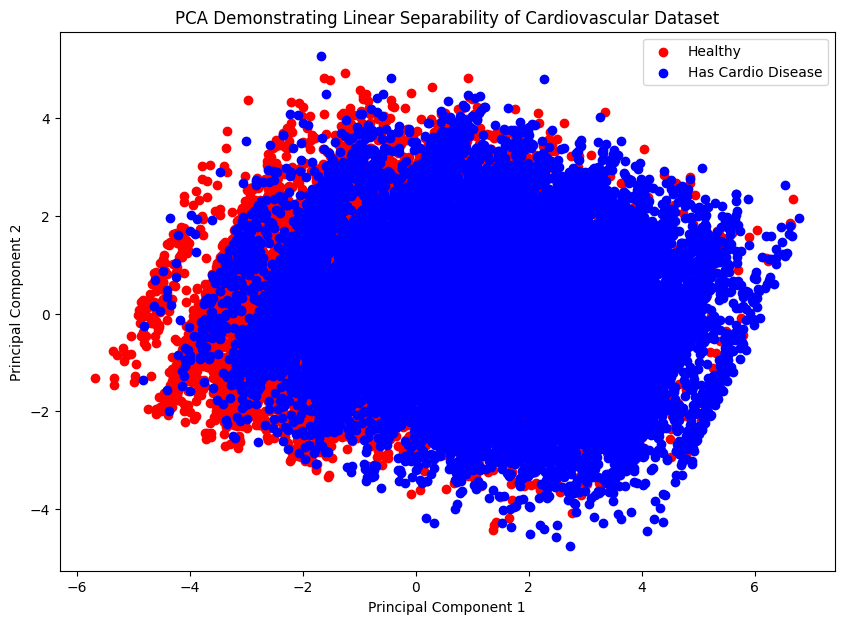

In [ ]:
# Applying Column transformer to standardize identified continuous columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ]
)

# Applying standardization transformations
X_transformed = preprocessor.fit_transform(X)

# Applying PCA to reduce datasets from higher dimensionality to 2 dimensions retaining maximum variance

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Scatter plot

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Healthy')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Has Cardio Disease')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Demonstrating Linear Separability of Cardiovascular Dataset')
plt.show()

The visualization above clearly illustrates the linear inseparability of the dataset as both components are complexly interwined making it impossible for a linear hyperplane to clearly separate them.

But then, the standard approach of using PCA and scatter plots to check a dataset for linear separability only works to an extent for providing a visual cue about linear separability.

For more practical scenarios, this is not definitive because PCA focuses on variance and not specificallt class separability. While the PCA-based visualization can serve as an initial step to gain insights, it would be better to supplement the linear seperability check with other rigorous methods like the Linear Programming Problem

### Checking for Linear Separability with the Linear Programming Problem Test

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ]
)

# Apply standardizing transformations for numeric features

X_transformed = preprocessor.fit_transform(X)

def is_linearly_separable(X, y):

    #Ascertain the number of samples and features in features
    m, n = X.shape

    # Constructing the constraints matrix for the linear programming problem

    A = np.zeros((m, n + 1))
    A[:, :-1] = X * y[:, np.newaxis]
    A[:, -1] = y

    # Objective function
    c = np.zeros(n + 1)

    # Solve the linear programming problem
    res = linprog(c, A_ub=-A, b_ub=-np.ones(m), method='highs')

    return res.success

# Determining linear separability of dataset

separable = is_linearly_separable(X_transformed, y.values)
if separable==False:
  print("The cardiovascular Dataset is not Linearly separable.Explore Non Linear SVC approaches")

The cardiovascular Dataset is not Linearly separable.Explore Non Linear SVC approaches


From the above Linear Programming Problem test, result res.success returned False. This indicates that the linear programming problem was unable to identify a hyperplane that can perfectly separate the classes in the dataset.

This suggests that the data points in this cardiovascular dataset cannot be split into two distinct classes using a linear boundary--demonstrating linear inseparability. Consequently, the need is established to explore non-linear classification methods, such as using a non-linear SVC (Support Vector Classifier) with kernel methods.

### Implementing SVC for non-linear classification with SVC

Non-linear SVC models which leverage kernel functions have demonstrated remarkable efficacy in handling non-linearly separable data.

> Many kernel mapping functions can be used – probably an
infinite number. We can use Normalized Polynomial, RBF,
linear, Sigmoid, GussianRBF and String Kernels etc based
on application requirement. But a few kernel functions have
been found to work well in for a wide variety of
applications. The default and recommended kernel function
is the Radial Basis Function (RBF). [Sanjib Saha et al 2023](https://www.researchgate.net/publication/376357755_An_Empirical_Comparison_of_Linear_and_Non-linear_Classification_Using_Support_Vector_Machines)


### Implementing Grid Search for Non-linear SVC

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for RBF kernel: {'svc__C': 100, 'svc__class_weight': 'balanced', 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best score for RBF kernel: 0.7197023237676233


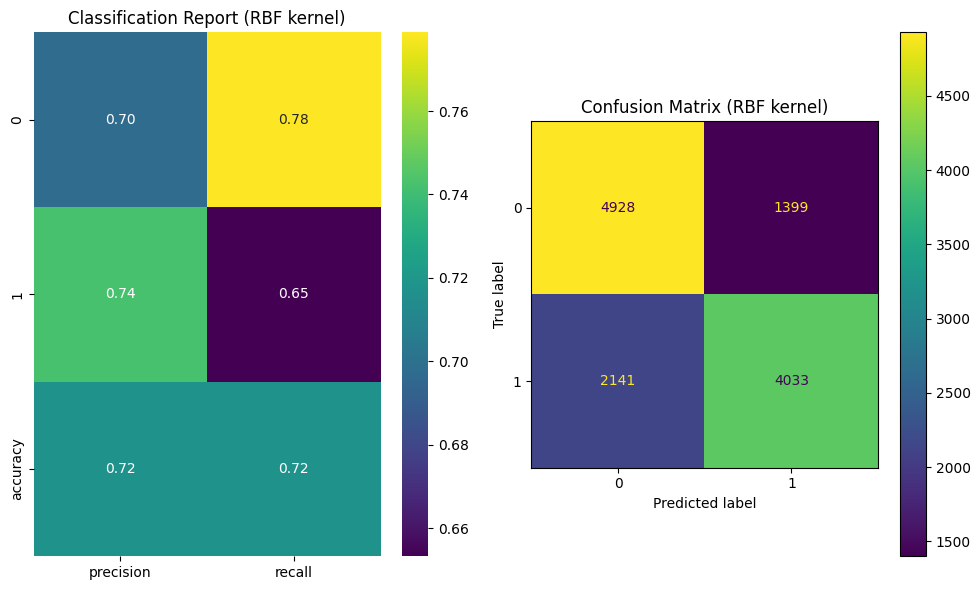

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters for Sigmoid kernel: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 0, 'svc__gamma': 0.001, 'svc__kernel': 'sigmoid'}
Best score for Sigmoid kernel: 0.7123429517048295


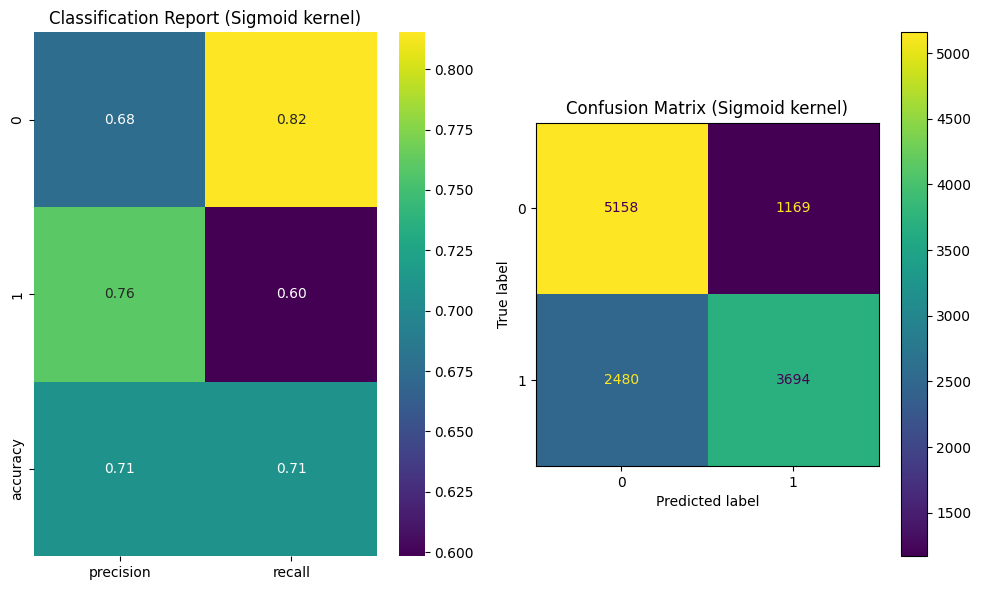

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


In [ ]:
# Modifying the performance visualization function for each kernel type

def performance_viz_2(y_test, y_pred, kernel_type):
    report = classification_report(y_test, y_pred, output_dict=True)
    report = pd.DataFrame(report).transpose()
    cm = confusion_matrix(y_test, y_pred)

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))

    # Plot classification report heatmap
    sns.heatmap(report.iloc[:-2, :-2], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])
    ax[0].set_title(f"Classification Report of ({kernel_type} kernel)")

    # Plot confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
    ax[1].set_title(f"Confusion Matrix ({kernel_type} kernel)")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Define the grid search function

def grid_search_kernel(X_train, y_train, X_test, y_test, param_grid, kernel_type):
    # Create Column transformer to apply different transformations to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features)
        ]
    )

    # Instantiating the SVC
    svc = SVC(random_state=42)

    # Defining the pipeline
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('pca', PCA(n_components=0.96)),
            ('svc', svc)
        ]
    )

    # Perform grid search with cross-validation and param_grid

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit training data to grid search
    grid_search.fit(X_train, y_train)

    # Print best parameters and score for each non-linear SVC kernel

    print(f"Best parameters achieved for {kernel_type} kernel are:", grid_search.best_params_)
    print(f"Best score achieved for {kernel_type} kernel is:", grid_search.best_score_)

    # Predict on the test set
    y_pred = grid_search.predict(X_test)

    # Visualize performance
    performance_viz_2(y_test, y_pred, kernel_type)

# Define the parameter grids for each kernel:rbf,sigmoid, and poly
param_grid_rbf = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'svc__class_weight': [None, 'balanced'],
    'svc__kernel': ['rbf']
}

param_grid_sigmoid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'svc__class_weight': [None, 'balanced'],
    'svc__kernel': ['sigmoid'],
    'svc__coef0': [0, 0.1, 0.5, 1]
}

param_grid_poly = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'svc__class_weight': [None, 'balanced'],
    'svc__kernel': ['poly'],
    'svc__degree': [2, 3, 4],
    'svc__coef0': [0, 0.1, 0.5, 1]
}

# Perform grid search and evaluation for each kernel type
grid_search_kernel(X_train, y_train, X_test, y_test, param_grid_rbf, 'RBF')
grid_search_kernel(X_train, y_train, X_test, y_test, param_grid_sigmoid, 'Sigmoid')
grid_search_kernel(X_train, y_train, X_test, y_test, param_grid_poly, 'Poly')


## **Random Forest Classifier**

In [ ]:
data.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   60       1     151    67.0    120     80            2     2      0     0   

   ...  physical_inactivity_risk  age_bins  height_bins  weight_bins  \
0  ...                         0         3            5            3   
1  ...                         0         3            3            5   
2  ...                         1         3            5            3   
3  ...                         0         2            5            5   
4  ...                         1         4            2            3   

         bmi  ap_hi_bins  ap_lo_bins  bmi_bins  map_bins  pp_bins  
0  21.967120           3           2         2         2        4  
1  34.927679           6           3         4         4        6  
2  23.507805           5           1         2         2        7  
3  28.710479           7           4         3         5        6  
4  29.384676           4           2         3         2        5  

[5 rows x 26 columns]

<Axes: >

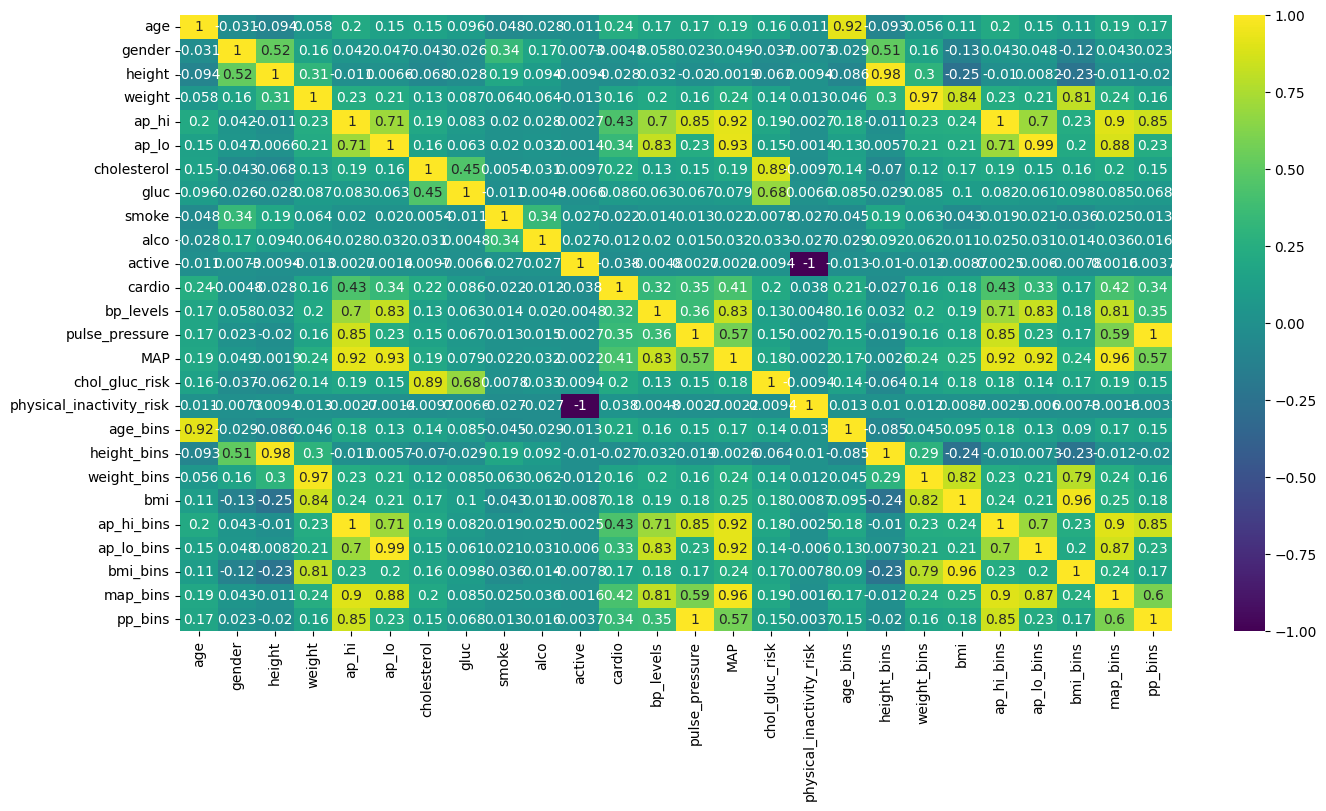

In [ ]:
##Checking for collinearity in dataset
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),cmap="viridis",annot=True)

In [ ]:
#Examining data features
number_of_features=len(data.columns)
print(f"Number of features in dataset is {number_of_features}")

Number of features in dataset is 26


### Training with full dataset

In [ ]:

X=data.drop("cardio",axis=1)
y=data["cardio"]


In [ ]:
#Splitting dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#Initializing RandomForest Classifier model
rfc=RandomForestClassifier(
    n_estimators=100, # Chosen Number of trees in the forest ensemble
    max_depth=5, # Maximum depth of each decision tree
    max_features="sqrt", # Number of features to explore in search for the best split
    min_samples_leaf=1, # Minimum number of samples required to qualify as a leaf node
    min_samples_split=2, # Minimum number of samples required to split an internal node
    random_state=42  # Setting random seed for reproducibility
)

Model accuracy is 0.72

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6327
           1       0.75      0.65      0.70      6174

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501



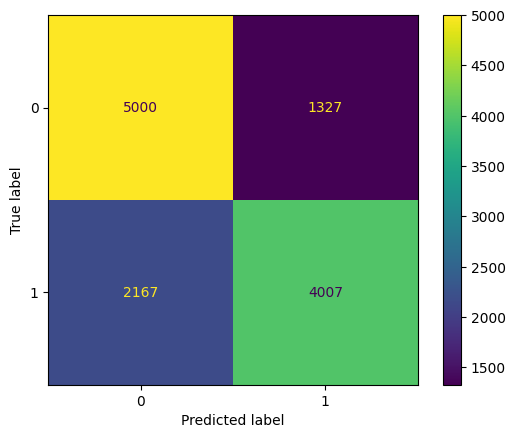

In [ ]:
#Training random forest classifier
rfc.fit(X_train,y_train)

#predict on unseen data
y_pred=rfc.predict(X_test)

#Evaluate model performance

accuracy=accuracy_score(y_test,y_pred)
print(f"Model accuracy is {accuracy:.2f}\n")
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Manually reducing unimportant feature to reduce dimensionality

In [ ]:
#Examining Feature Importance of features
feature_importance=rfc.feature_importances_
feature_importance=feature_importance.tolist()
for feature,importance in zip(data.columns,feature_importance):
  print(f"The importance of {feature} is {importance}")

The importance of age is 0.046317646213634746
The importance of gender is 0.0002500843095226295
The importance of height is 0.0012337532041880779
The importance of weight is 0.0021553503670296934
The importance of ap_hi is 0.21967444684227747
The importance of ap_lo is 0.02001533322150934
The importance of cholesterol is 0.04775290998959715
The importance of gluc is 0.002737164416836413
The importance of smoke is 0.0007126421560464386
The importance of alco is 0.00021001794912504598
The importance of active is 0.0012169392032571706
The importance of cardio is 0.03843056824526749
The importance of bp_levels is 0.0747558405815673
The importance of pulse_pressure is 0.0821369374670338
The importance of MAP is 0.02496533618349569
The importance of chol_gluc_risk is 0.00152106401701924
The importance of physical_inactivity_risk is 0.02814776529587095
The importance of age_bins is 0.0005846998407061079
The importance of height_bins is 0.0015998314046110956
The importance of weight_bins is 0.

The feature_importance figures reveals ap_hi (systolic blood pressure) was the strongest contributor to model performance. This was followed by features like pulse_pressure and bmi.

At the other end, features like age_bins,gender,smoke,alco,active were largely insignificant to the model performance. Next,is an experiment on model performance with these features removed.

In [ ]:
  data_reduced=data.drop(["age_bins","gender","alco","active"],axis=1)
  data_reduced.head()

age  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  cardio  \
0   50     168    62.0    110     80            1     1      0       0   
1   55     156    85.0    140     90            3     1      0       1   
2   51     165    64.0    130     70            3     1      0       1   
3   48     169    82.0    150    100            1     1      0       1   
4   60     151    67.0    120     80            2     2      0       0   

   bp_levels  ...  chol_gluc_risk  physical_inactivity_risk  height_bins  \
0          2  ...               0                         0            5   
1          3  ...               2                         0            3   
2          2  ...               2                         1            5   
3          3  ...               0                         0            5   
4          2  ...               1                         1            2   

   weight_bins        bmi  ap_hi_bins  ap_lo_bins  bmi_bins  map_bins  pp_bins  
0            3  21.967120           3           2         2         2        4  
1            5  34.927679           6           3         4         4        6  
2            3  23.507805           5           1         2         2        7  
3            5  28.710479           7           4         3         5        6  
4            3  29.384676           4           2         3         2        5  

[5 rows x 22 columns]

In [ ]:
X_reduced,y=data_reduced.drop("cardio",axis=1),data["cardio"]
X_train_reduced,X_test_reduced,y_train,y_test=train_test_split(X_reduced,y,random_state=42,test_size=0.2,stratify=y)

Reduced Data's Model accuracy is 0.72

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6327
           1       0.75      0.65      0.70      6174

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501



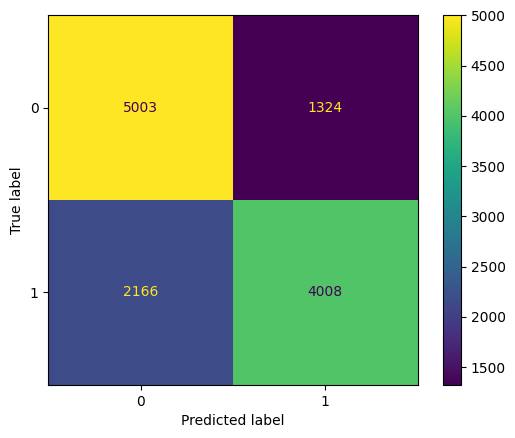

In [ ]:
#Initializing RandomForest Classifier model for reduced data
rfc_reduced=RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

#Train random forest classifier with reduced dataset

rfc_reduced.fit(X_train_reduced,y_train)

#Predict with trained random forest classifier
reduced_data_pred=rfc_reduced.predict(X_test_reduced)

#Evaluate model performance
reduced_data_accuracy=accuracy_score(y_test,reduced_data_pred)
print(f"Reduced Data's Model accuracy is {accuracy:.2f}\n")
print(classification_report(y_test,reduced_data_pred))

#Extract and visualize confusion matrix
cm= confusion_matrix(y_test, reduced_data_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
#print(confusion_matrix(y_test,reduced_data_pred))


### PCA Reduction

PCA's Model accuracy is 0.72

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      6327
           1       0.74      0.63      0.68      6174

    accuracy                           0.71     12501
   macro avg       0.71      0.71      0.71     12501
weighted avg       0.71      0.71      0.71     12501



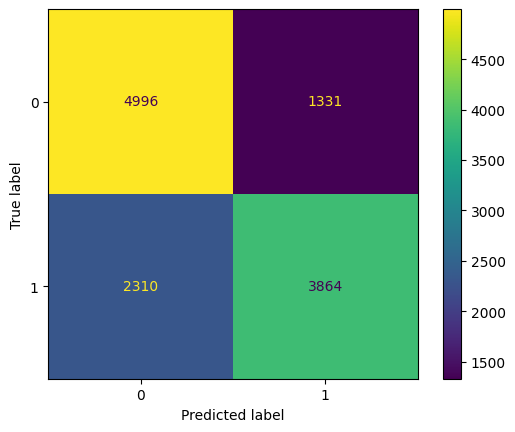

In [ ]:
#Instantanting PCA reduction
pca=PCA(random_state=42,n_components=0.96) #n_components set to 0.96 to retain 96% variance
X_train_pca=pca.fit_transform(X_train) #fitting and transforming training set
X_test_pca=pca.transform(X_test) #transforming test set
#Initializing RandomForest Classifier model
rfc_pca=RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

#train and test random forest classifier on PCA reduced dataset
rfc_pca.fit(X_train_pca,y_train)
y_pred_pca=rfc_pca.predict(X_test_pca)

#Evaluate RFC performance on PCA-reduced dataset

pca_accuracy=accuracy_score(y_test,y_pred_pca)
print(f"PCA's Model accuracy is {accuracy:.2f}\n")
print(classification_report(y_test,y_pred_pca))
cm=confusion_matrix(y_test,y_pred_pca)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


### Overview of the Experiments

####Experiment 1: Full Feature Set

Dataset: All 26 features.

Performance: Accuracy of 72%, 0-class recall of 0.79, and 1-class recall of 0.65.

####Experiment 2: Reduced Feature Set

Dataset: Eradicated features with insignificant contribution to model performance (age_bins, gender, smoke, alco, active).

Performance: Identical to the full feature set with an accuracy of 72%, 0-class recall of 0.79, and 1-class recall of 0.65.

####Experiment 3: PCA-Reduced Feature Set

Dataset: Features reduced using PCA, retaining 96% of variance.

Performance: Slightly lower with an accuracy of 71%, 0-class recall of 0.79, and 1-class recall of 0.63.

### Hyperparameter Tuning for RandomForest Classsifier




In [ ]:
#Implementing RandomizedSearchCV()

rfc=RandomForestClassifier(random_state=42)
param_distributions={
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_distributions,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the model
randomized_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters From RandomizedSearchCV are: {randomized_search.best_params_}")
print(f"Best Score From RandomizedSearchCV is: {randomized_search.best_score_:.2f}")

# Evaluating the best estimator on the test set

best_rfc= randomized_search.best_estimator_
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

Best Parameters From RandomizedSearchCV are: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 82}
Best Score From RandomizedSearchCV is: 0.73
Test Set Accuracy: 0.72


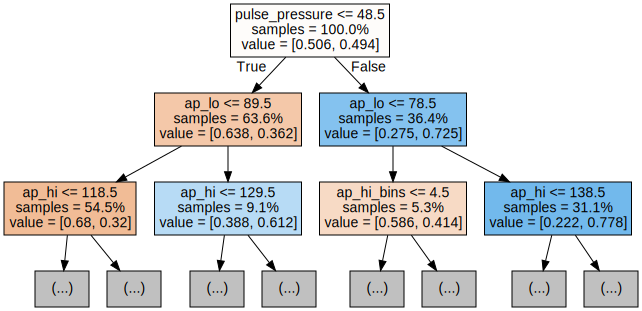

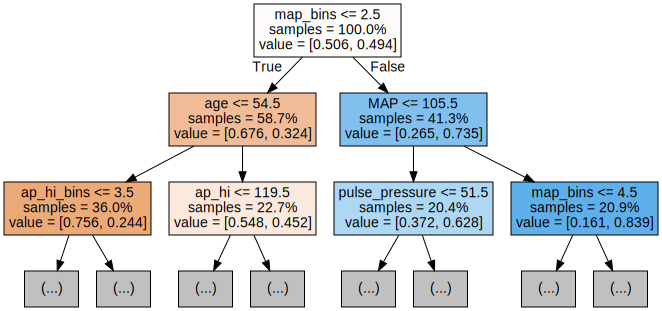

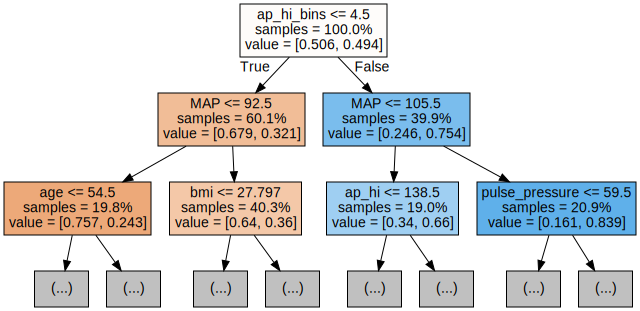

In [ ]:
# Visualizing the first three decision trees from the best estimator from the RandomizedSearchCV
for i in range(3):
    tree = best_rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## **Gradient Boosting Classifier**

In [ ]:
#Splitting Dataset into train and test sets
X=data.drop("cardio",axis=1)
y=data["cardio"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

In [ ]:
#Initializing Gradient Boosting Classifier

gbm=GradientBoostingClassifier(n_estimators=100, # Set the optimal number of trees
                               min_samples_leaf=1, # Minimum samples needed to establish a leaf node
                               min_samples_split=2,  # Minimum samples needed to split an internal node
                               loss="log_loss", # Loss function to be optimized
                               max_depth=5,  # Maximum depth of each decision trees
                               learning_rate=0.01, # Learning rate for the gradient boosting process
                               random_state=42)

In [ ]:
#Training Gradient Boosting Classifier
gbm.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=42)

In [ ]:
#Predicting the test set
y_pred=gbm.predict(X_test)

Model Accuracy is 0.73


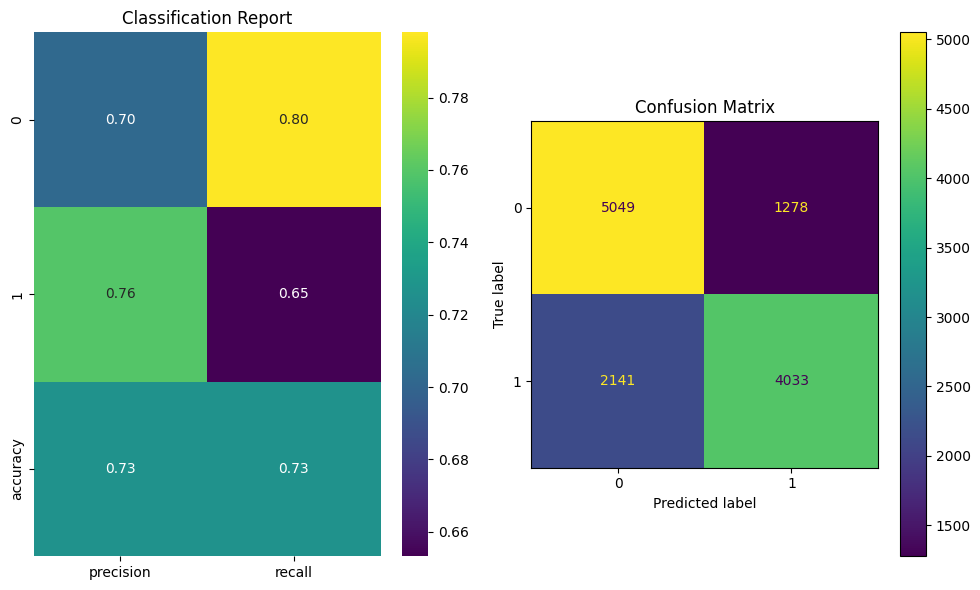

In [ ]:
#Evaluating Gradient Boosting Classifier performance

accuracy=accuracy_score(y_test,y_pred)
#print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred,output_dict=True)
report_df=pd.DataFrame(class_report).transpose()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot classification report heatmap
sns.heatmap(report_df.iloc[:-2, :-2], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])

ax[0].set_title("Classification Report")

# Calculate confusion matrix
#cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
ax[1].set_title("Confusion Matrix")

# Adjust layout
plt.tight_layout()

# Print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy is {accuracy:.2f}")

# Show the plots
plt.show()

In [ ]:
# Retrieving the feature importances from the GBM model
gbm.feature_importances_
imp=gbm.feature_importances_.tolist()  # Converting the feature importances to a list
X_data=data.drop("cardio",axis=1) # Dropping the target column 'cardio' to extract the feature columns
columns=X_data.columns
# Print the importance of each feature
for feature,importance in zip(columns,imp):
  print(f"Importance of {feature} is {importance}")

Importance of age is 0.12422249925644611
Importance of gender is 0.00012698828661285587
Importance of height is 0.0019523507815802706
Importance of weight is 0.004946581081752592
Importance of ap_hi is 0.43879748776505006
Importance of ap_lo is 0.00033169408682425357
Importance of cholesterol is 0.07165069598694651
Importance of gluc is 0.005178150512265939
Importance of smoke is 0.0018580262638075223
Importance of alco is 0.00017427897364368107
Importance of active is 0.003119079442704385
Importance of bp_levels is 8.146686639596494e-06
Importance of pulse_pressure is 0.0034570728229661378
Importance of MAP is 0.008533716979355753
Importance of chol_gluc_risk is 0.0072392819973397405
Importance of physical_inactivity_risk is 0.002514241939412826
Importance of age_bins is 0.00015769645021094508
Importance of height_bins is 8.302794101502552e-05
Importance of weight_bins is 0.00012027758303317502
Importance of bmi is 0.009635652230267095
Importance of ap_hi_bins is 0.31568001785552996
I

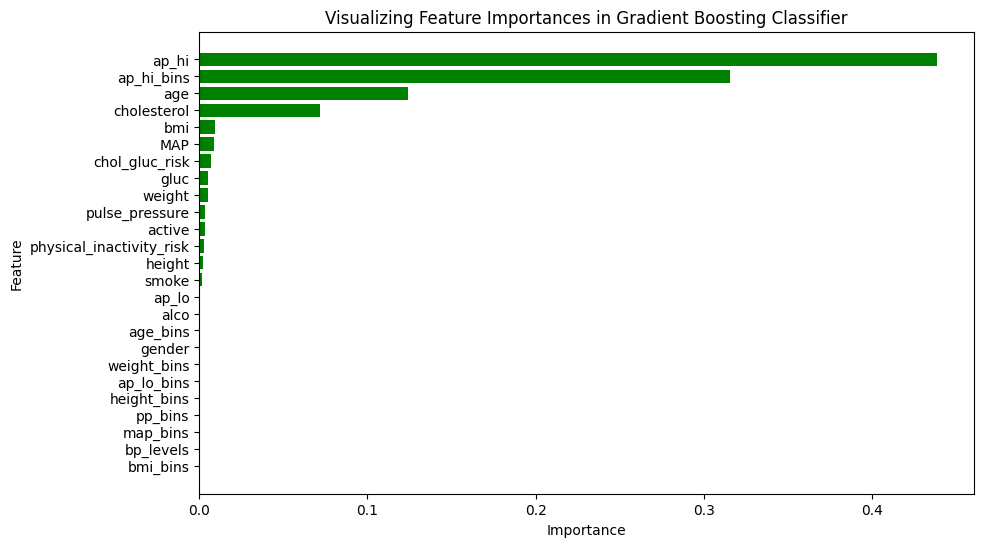

In [ ]:
# Create a pandas DataFrame for enhanced feature importance visualization

feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': imp
})

# Sort the resulting feature importance dataFrame by importance values

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Visualizing Feature Importances in Gradient Boosting Classifier')
plt.gca().invert_yaxis()  # Prioritizing Highest contributing features at the top
plt.show()

### Implementing Early Stopping

Originally, an n_estimator parameter of 100 was used. While this is Sklearn's default -- favored for its balance between complexity and performance -- there is possibility of improved performance with a varied number of estimators.

To evaluate this, an early stopping mechanism for Gradient Boosting Classifier is implemented.

In [ ]:
#Splitting dataset into training and test sets for early stoping mechanism implementation
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
gbm_early=GradientBoostingClassifier(n_estimators=1000,
                                     min_samples_leaf=1,
                                     min_samples_split=2,
                                     max_depth=5,
                                     learning_rate=0.1,
                                     loss="log_loss",
                                     random_state=42,
                                     subsample=1
                                     )

In [ ]:
#Implementing Early Stopping to determine best number of trees or boosting stages for Gradient Boosting Classifier

best_score,score,patience,tolerance=0,0,0,100 # Initializing early stopping parameters

gbm_early.fit(X_train,y_train) # Fitting the Gradient Boosting classifier model to the training data

# Iterate through all staged predictions to extract the best number of boosting stages

for iter,prediction in enumerate(gbm_early.staged_predict(X_val)):
  score=accuracy_score(y_val,prediction) # Compute accuracy score for the current stage
  # Update best score and iteration upon achieving a score superior to the current score
  if score>best_score:
    best_score=score
    best_iter=iter
    patience=0
  else:
    patience+=1  # Increase patience if no improvement is found, with loop breaking if tolerance exceeded
    if patience>=tolerance:
      break

# Gradient Boosting Classifier is initialized again with the best number of estimators identified from early stopping
gbm_early=GradientBoostingClassifier(n_estimators=best_iter+1,
                                     min_samples_leaf=1,
                                     min_samples_split=2,
                                     max_depth=5,
                                     learning_rate=0.1,
                                     loss="log_loss",
                                     random_state=42,
                                     subsample=1
                                     )
# Fitting the optimized Gradient Boosting model to the training data
gbm_early.fit(X_train,y_train)

# Predicting with optmized gradient boosting classifer model on the validation
pred=gbm_early.predict(X_val)

Best accuracy of 0.73 was found from Early Stopping at 134th iteration
The accuracy of the retrained model with 134 trees is 0.73


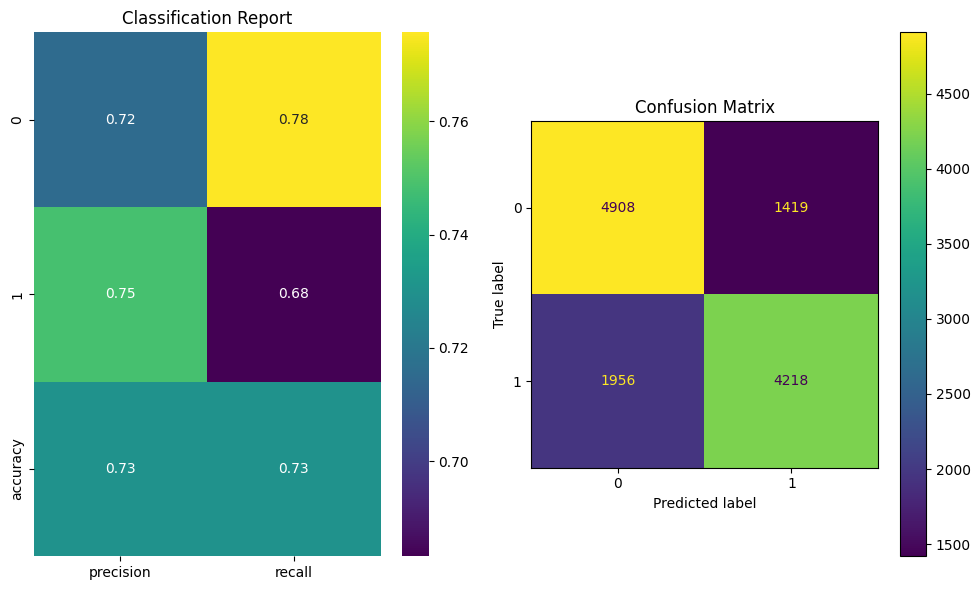

In [ ]:
#Evaluating Gradient Boosting Classifier performance
accuracy=accuracy_score(y_val,pred)
print(f"Best accuracy of {best_score:.2f} was found from Early Stopping at {best_iter+1}th iteration")
print(f"The accuracy of the retrained model with {best_iter+1} trees is {accuracy:.2f}")
#classification_report(y_val,pred)
cm=confusion_matrix(y_val,pred)
class_report=classification_report(y_val,pred,output_dict=True)
report_df=pd.DataFrame(class_report).transpose()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot classification report heatmap
sns.heatmap(report_df.iloc[:-2, :-2], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])

ax[0].set_title("Classification Report")

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
ax[1].set_title("Confusion Matrix")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Implementing Feature Scaling to observe model senstivity to feature scaling

A number of models like based on gradient descent are sensitive to feature scaling. A study titled "Influence of feature scaling on convergence of gradient iterative algorithm" by [Xing Wan](https://www.researchgate.net/publication/333869488_Influence_of_feature_scaling_on_convergence_of_gradient_iterative_algorithm) found that:

> "When  the  feature  data  value  is large, the normalization method can be used to  obtain  better convergence"

The gradient boosting classifier is known to use a gradient descent, iteratively accumulating decision trees in a way to reduce the residual errors (gradients) of the previous trees, optimizing the overall loss function.

This necessitates the need to investigate the effect of feature scale on model peformance by normalizing continuous features in the dataset



In [ ]:
data.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   

   ...  physical_inactivity_risk  age_bins  height_bins  weight_bins  \
0  ...                         0         3            5            3   
1  ...                         0         3            3            5   
2  ...                         1         3            5            3   

         bmi  ap_hi_bins  ap_lo_bins  bmi_bins  map_bins  pp_bins  
0  21.967120           3           2         2         2        4  
1  34.927679           6           3         4         4        6  
2  23.507805           5           1         2         2        7  

[3 rows x 26 columns]

In [ ]:
#Creating a dataset variant with normalized continuous features

data_copy=data.copy()
scaled=["age","height","weight","ap_hi","ap_lo","bmi","MAP","pulse_pressure"]
for feature in scaled:
  data_copy[feature]=data_copy[feature]/(data_copy[feature].max())
data_copy.head()

age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0  0.781250       2  0.903226  0.579439  0.647059  0.761905            1   
1  0.859375       1  0.838710  0.794393  0.823529  0.857143            3   
2  0.796875       1  0.887097  0.598131  0.764706  0.666667            3   
3  0.750000       2  0.908602  0.766355  0.882353  0.952381            1   
4  0.937500       1  0.811828  0.626168  0.705882  0.761905            2   

   gluc  smoke  alco  ...  physical_inactivity_risk  age_bins  height_bins  \
0     1      0     0  ...                         0         3            5   
1     1      0     0  ...                         0         3            3   
2     1      0     0  ...                         1         3            5   
3     1      0     0  ...                         0         2            5   
4     2      0     0  ...                         1         4            2   

   weight_bins       bmi  ap_hi_bins  ap_lo_bins  bmi_bins  map_bins  pp_bins  
0            3  0.431644           3           2         2         2        4  
1            5  0.686313           6           3         4         4        6  
2            3  0.461917           5           1         2         2        7  
3            5  0.564148           7           4         3         5        6  
4            3  0.577395           4           2         3         2        5  

[5 rows x 26 columns]

In [ ]:
#Initilizing gradient boosting classifier model

gbm_scaled=GradientBoostingClassifier(random_state=42,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      max_depth=5,
                                      n_estimators=1000,
                                      loss="log_loss",
                                      learning_rate=0.1,
                                      subsample=1.0
)

In [ ]:
#Evaluating best model performance with early stopping

best_iter,best_score,patience,tolerance=0,0,0,100
X,y=data_copy.drop("cardio",axis=1),data_copy["cardio"]
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)
gbm_scaled.fit(X_train,y_train)
for iter,pred in enumerate(gbm_scaled.staged_predict(X_val)):
  accuracy=accuracy_score(y_val,pred)
  if accuracy>best_score:
    best_score=accuracy
    best_iter=iter
    patience=0
  else:
    patience+=1
    if patience>=tolerance:
      break

gbm_scaled=GradientBoostingClassifier(random_state=42,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      max_depth=5,
                                      n_estimators=best_iter+1,
                                      loss="log_loss",
                                      learning_rate=0.1,
                                      subsample=1.0
)

gbm_scaled.fit(X_train,y_train)
pred=gbm_scaled.predict(X_val)


Model Accuracy is 0.73


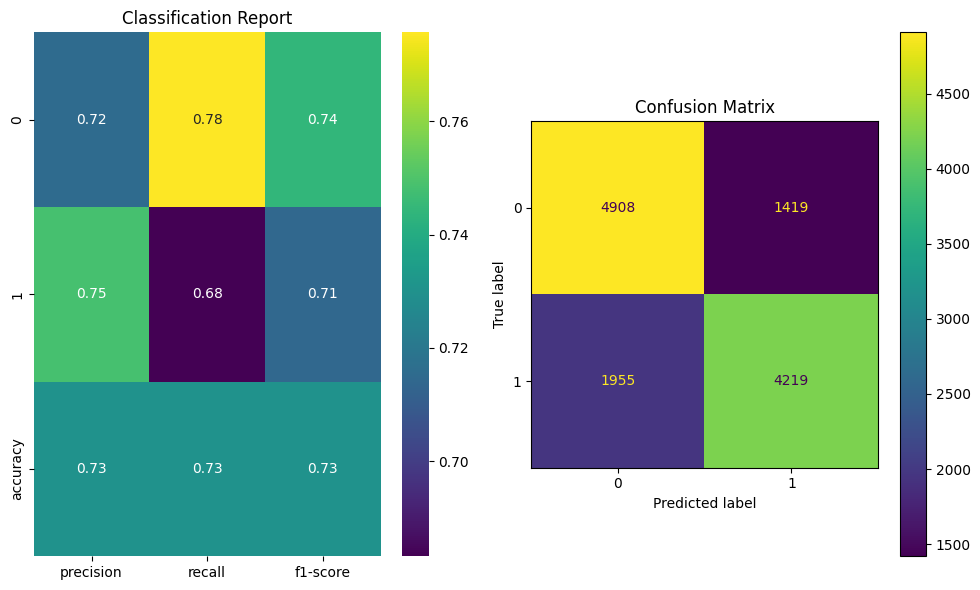

In [ ]:
# Evaluating Model Performance

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot classification report heatmap
sns.heatmap(report_df.iloc[:-2, :-1], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])

ax[0].set_title("Classification Report")

# Calculate confusion matrix
cm = confusion_matrix(y_val, pred)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
ax[1].set_title("Confusion Matrix")

# Adjust layout
plt.tight_layout()

# Print model accuracy
accuracy = accuracy_score(y_val, pred)
print(f"Model Accuracy is {accuracy:.2f}")

# Show the plots
plt.show()

### Analysis of Results from Normalized Data

The performance metrics above are highly identifical to those achieved when the data was not normalized with early stopping. This reinforces that gradient boosting classifiers are not sensitive to feature scale variations.

This is because unlike linear (or distance-based models), gradient boosting classifier leverages decision trees as base learners which partition data based on feature thresholds and are not sensitive to monotonic transformations.

This data partitioning is executed based on feature value order and not based on feature magnitude. This way, variations in the magnitude of the feature values -- as triggered by scaling techniques like normalization -- have litle to no value on gradient boosting machine performance

### Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
X=data.drop("cardio",axis=1)
y=data["cardio"]
#Splitting Dataset into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

In [ ]:
#Initializing randomizedsearch and creating param distrubution
gbm_randomized=GradientBoostingClassifier(random_state=42)
# Define the parameter distribution for randomized search
param_dist={
    "n_estimators":randint(100,600),  # range of boosting stages
    "min_samples_split":randint(2,50), #range of min_sample splits to explore in Randomized search
    "min_samples_leaf":randint(1,10),  # range of minimum number of samples required to be at a leaf node
    "loss":["log_loss","exponential"], #types of loss functions to be explored
    "learning_rate":uniform(0.001,0.2), #range of learning rates
    "subsample":[0.5,1],  # fraction of samples used for fitting the individual base learners
    "max_features": ['sqrt', 'log2', None] #Number of features to consider when looking for the best split
}

# Initialize the RandomizedSearchCV with the parameter distribution
random_search=RandomizedSearchCV(estimator=gbm_randomized,n_iter=100,param_distributions=param_dist,cv=5,refit=True,n_jobs=-1,scoring="accuracy")
# Fitting the RandomizedSearchCV to the training CVD data
random_search.fit(X_train,y_train)
# Extracting the best parameters identified by the randomized search
best_params=random_search.best_params_
best_model=random_search.best_estimator_
best_score=random_search.score(X_test,y_test)
print(f"Best parameters from Randomized Search for GBM is {best_params}")
print(f"Best Accuracy from Randomzied Search for GBM Model is {best_score}")

Best parameters from Randomized Search for GBM is {'learning_rate': 0.054919062035559456, 'loss': 'log_loss', 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 46, 'n_estimators': 598, 'subsample': 1}
Best Accuracy from Randomzied Search for GBM Model is 0.730581553475722


Model Accuracy is 0.73


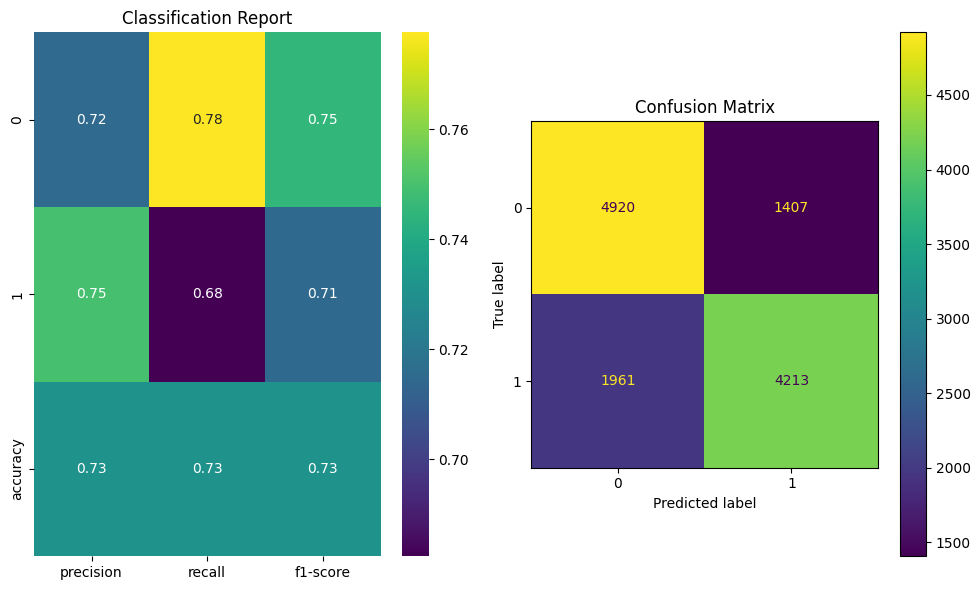

In [ ]:
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
grid_report=classification_report(y_test,y_pred,output_dict=True)
grid_df=pd.DataFrame(grid_report).transpose()
cm=confusion_matrix(y_test,y_pred)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot classification report heatmap
sns.heatmap(grid_df.iloc[:-2, :-2], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])
ax[0].set_title("Classification Report")

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
ax[1].set_title("Confusion Matrix")

# Adjust layout
plt.tight_layout()

# Print model accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy is {accuracy:.2f}")

# Show the plots
plt.show()


## **Neural Networks**

In [ ]:
data.head(3) #Show first three instances of the CVD dataset

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   

   ...  physical_inactivity_risk  age_bins  height_bins  weight_bins  \
0  ...                         0         3            5            3   
1  ...                         0         3            3            5   

         bmi  ap_hi_bins  ap_lo_bins  bmi_bins  map_bins  pp_bins  
0  21.967120         3.0         2.0       2.0       2.0      4.0  
1  34.927679         6.0         3.0       4.0       4.0      6.0  

[2 rows x 26 columns]

In [ ]:
num_features=data.columns[data.nunique()>20] #curate continuous features in the dataset

In [ ]:
num_features #Display continuous features

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'pulse_pressure', 'MAP',
       'bmi'],
      dtype='object')

In [ ]:
# Creating the independent features (X) and the target variable (y)
X,y=data.drop("cardio",axis=1),data["cardio"]
# Splitting the data into training and testing sets with stratification to maintain class distribution
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
# Checking the shapes of the training and testing sets
X_train.shape,X_test.shape

((50004, 25), (12501, 25))

In [ ]:
#Normalize continuous features in dataset using Column Transformer
preprocessor=ColumnTransformer(
    transformers=[("scaler",MinMaxScaler(),num_features)],
    remainder="passthrough"
)

#fit and transform training and test sets
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [ ]:
# Aligning model's input shape to the number of attributes in the training set
input_shape=(X_train.shape[1],)
# Initialize a Sequential model
model=Sequential([
    Input(shape=input_shape),
    Dense(300,activation="relu"), # Dense layer added with 300 neurons and ReLU activation
    Dense(500,activation="relu"), # Dense layer added with 500 neurons and ReLU activation
    Dense(500,activation="relu"), # Dense layer added with 500 neurons and ReLU activation
    Dense(500,activation="relu"), # Dense layer added with 500 neurons and ReLU activation
    Dense(1,activation="sigmoid") # Output layer added with 1 neuron and sigmoid activation for binary classification
])
#Model compilation with Adan optimizer, accuracy metric and binary cross-entropy loss function
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#Summarize model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               7800      
                                                                 
 dense_1 (Dense)             (None, 500)               150500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 1)                 501       
                                                                 
Total params: 659801 (2.52 MB)
Trainable params: 659801 (2.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


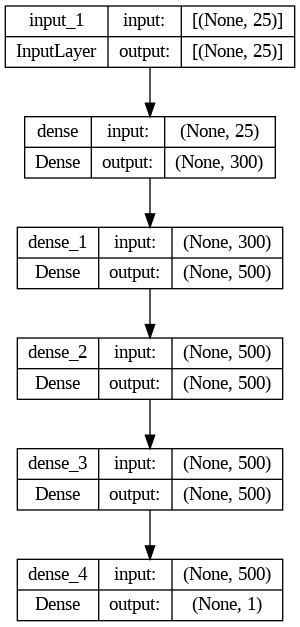

In [ ]:
#plot and save the Sequential NN model as an image file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the model architecture plot
Image(filename='model_architecture.png')

In [ ]:
#Instantiate early stopping mechanism with patience,monitor and best weight retored
early_stopping=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True)
#Train Sequential model with validation split,batch size and defined early stopping mechanism
history=model.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=32,callbacks=[early_stopping],verbose=2)

Epoch 1/200
1251/1251 - 11s - loss: 0.5769 - accuracy: 0.7087 - val_loss: 0.5667 - val_accuracy: 0.7190 - 11s/epoch - 9ms/step
Epoch 2/200
1251/1251 - 5s - loss: 0.5624 - accuracy: 0.7223 - val_loss: 0.5802 - val_accuracy: 0.7112 - 5s/epoch - 4ms/step
Epoch 3/200
1251/1251 - 6s - loss: 0.5585 - accuracy: 0.7231 - val_loss: 0.5747 - val_accuracy: 0.7159 - 6s/epoch - 5ms/step
Epoch 4/200
1251/1251 - 10s - loss: 0.5572 - accuracy: 0.7257 - val_loss: 0.5552 - val_accuracy: 0.7250 - 10s/epoch - 8ms/step
Epoch 5/200
1251/1251 - 8s - loss: 0.5563 - accuracy: 0.7248 - val_loss: 0.5636 - val_accuracy: 0.7184 - 8s/epoch - 7ms/step
Epoch 6/200
1251/1251 - 7s - loss: 0.5555 - accuracy: 0.7255 - val_loss: 0.5555 - val_accuracy: 0.7266 - 7s/epoch - 5ms/step
Epoch 7/200
1251/1251 - 5s - loss: 0.5543 - accuracy: 0.7256 - val_loss: 0.5574 - val_accuracy: 0.7284 - 5s/epoch - 4ms/step
Epoch 8/200
1251/1251 - 5s - loss: 0.5532 - accuracy: 0.7259 - val_loss: 0.5551 - val_accuracy: 0.7301 - 5s/epoch - 4ms/s

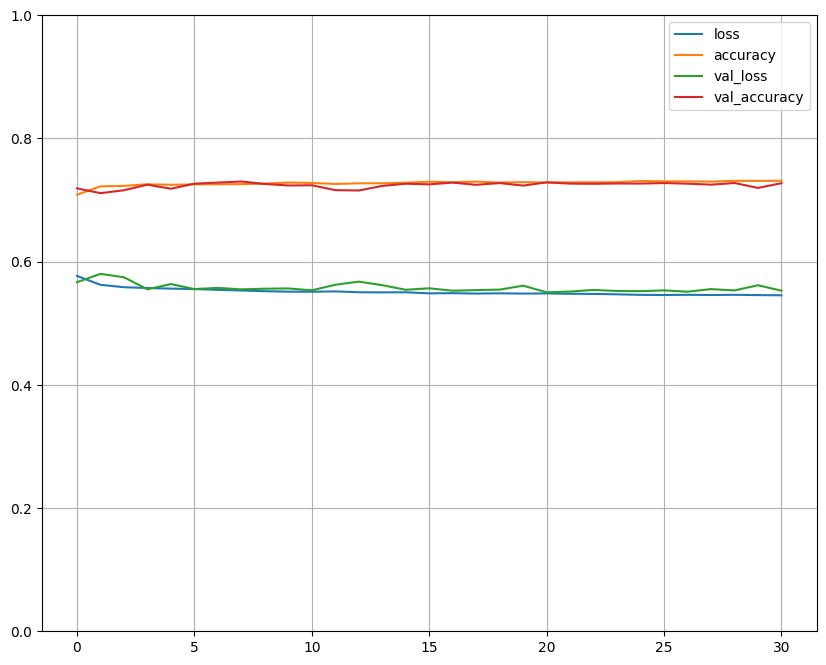

In [ ]:
#Visualizing Training and Validation Performance
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#Evaluating model performance
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Neural network model accuracy is {accuracy:.2f}")

391/391 [==============================] - 1s 3ms/step - loss: 0.5522 - accuracy: 0.7282
Neural network model accuracy is 0.73


In [ ]:
def performance_viz(y_test,y_pred):

  report=classification_report(y_test,y_pred,output_dict=True)
  report=pd.DataFrame(report).transpose()
  cm=confusion_matrix(y_test,y_pred)

  # Create subplots
  fig, ax = plt.subplots(1, 2, figsize=(10, 6))

  # Plot classification report heatmap
  sns.heatmap(report.iloc[:-2, :-2], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])

  ax[0].set_title("Classification Report")

  # Plot confusion matrix
  ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
  ax[1].set_title("Confusion Matrix")

  # Adjust layout
  plt.tight_layout()

  # Show the plots
  plt.show()

391/391 [==============================] - 1s 2ms/step


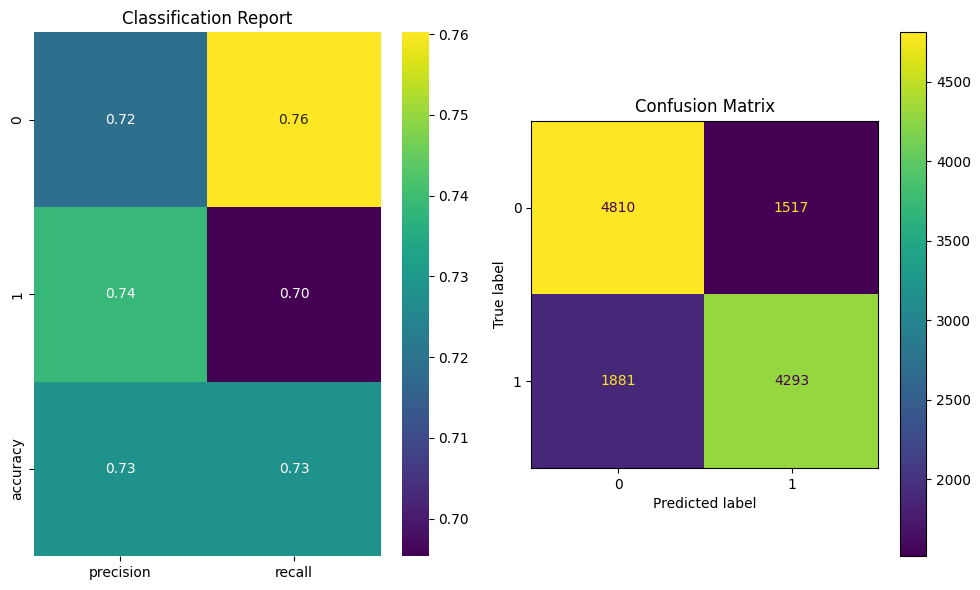

In [ ]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
performance_viz(y_test,y_pred)

### Experimenting with dropout and L2 regularization
Dropout is a famous technique for improving generalization of neural networks. Dropouts are incredibly effective in preventing co-adaptation between neurons.This prevents excessive reliance of the model on a particular pack of neurons, making the model more resilient and enhancing its performance on unseen data.

In dropout:

> The key idea is to randomly drop units (along with their connections) from the neuralnetwork during training. This prevents units from co-adapting too much. During training,dropout samples from an exponential number of different “thinned” networks. At test time,it is easy to approximate the effect of averaging the predictions of all these thinned networks by simply using a single unthinned network that has smaller weights. [Geoffrey Hinton et al](https://jmlr.org/papers/v15/srivastava14a.html)



In [ ]:
# Aligning model's input shape to the number of attributes in the training set
input_shape=(X_train.shape[1],)
# Initialize a Sequential model
model=Sequential([
    Input(shape=input_shape),
    Dense(300,activation="relu",kernel_regularizer=l2(0.001)), # Dense layer added with 300 neurons,L2 regularization ReLU activation
    Dropout(0.25), #Dropout layer added with 25% dropout rate
    Dense(500,activation="relu",kernel_regularizer=l2(0.001)), # Dense layer added with 300 neurons,L2 regularization ReLU activation
    Dropout(0.25),#Dropout layer added with 25% dropout rate
    Dense(500,activation="relu",kernel_regularizer=l2(0.001)), # Dense layer added with 300 neurons,L2 regularization ReLU activation
    Dropout(0.25), #Dropout layer added with 25% dropout rate
    Dense(500,activation="relu",kernel_regularizer=l2(0.001)), # Dense layer added with 300 neurons,L2 regularization ReLU activation
    Dropout(0.25), #Dropout layer added with 25% dropout rate
    Dense(1,activation="sigmoid") # Output layer added with 1 neuron and sigmoid activation for binary classification
])
#Model compilation with Adan optimizer, accuracy metric and binary cross-entropy loss function
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#Summarize model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 300)               7800      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               150500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 500)              

In [ ]:
#Instantiate early stopping mechanism with patience,monitor and best weight retored
early_stopping=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True)

#Train Sequential model with validation split,batch size and defined early stopping mechanism
history_2=model.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=32,callbacks=[early_stopping],verbose=2)


Epoch 1/200
1251/1251 - 15s - loss: 0.7816 - accuracy: 0.6981 - val_loss: 0.6035 - val_accuracy: 0.7178 - 15s/epoch - 12ms/step
Epoch 2/200
1251/1251 - 7s - loss: 0.5937 - accuracy: 0.7142 - val_loss: 0.5942 - val_accuracy: 0.7201 - 7s/epoch - 6ms/step
Epoch 3/200
1251/1251 - 10s - loss: 0.5846 - accuracy: 0.7177 - val_loss: 0.5809 - val_accuracy: 0.7222 - 10s/epoch - 8ms/step
Epoch 4/200
1251/1251 - 10s - loss: 0.5815 - accuracy: 0.7183 - val_loss: 0.5727 - val_accuracy: 0.7213 - 10s/epoch - 8ms/step
Epoch 5/200
1251/1251 - 12s - loss: 0.5802 - accuracy: 0.7198 - val_loss: 0.5850 - val_accuracy: 0.7199 - 12s/epoch - 9ms/step
Epoch 6/200
1251/1251 - 9s - loss: 0.5778 - accuracy: 0.7195 - val_loss: 0.5780 - val_accuracy: 0.7197 - 9s/epoch - 7ms/step
Epoch 7/200
1251/1251 - 7s - loss: 0.5777 - accuracy: 0.7188 - val_loss: 0.5777 - val_accuracy: 0.7123 - 7s/epoch - 5ms/step
Epoch 8/200
1251/1251 - 5s - loss: 0.5763 - accuracy: 0.7185 - val_loss: 0.5686 - val_accuracy: 0.7251 - 5s/epoch - 

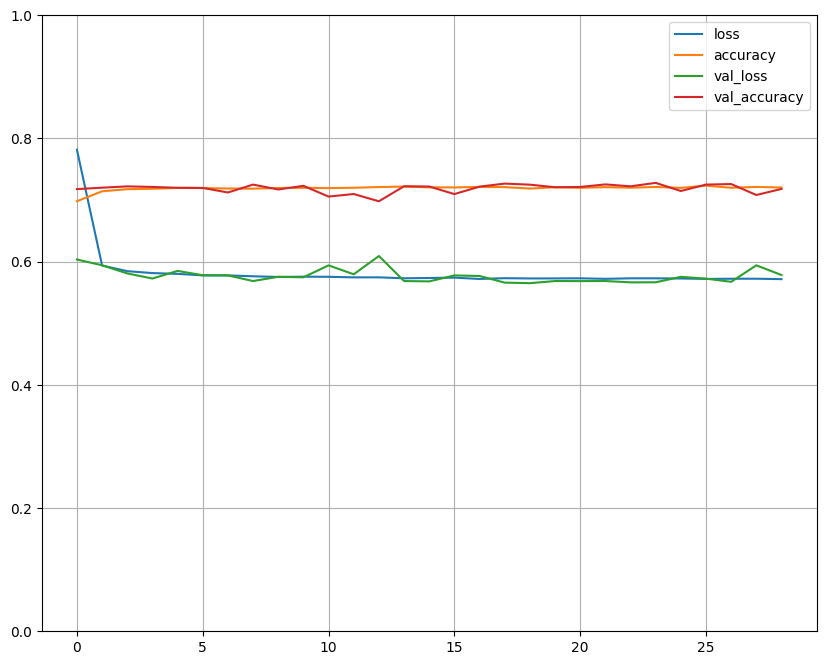

In [ ]:
#Visualizing Training and Validation Performance
pd.DataFrame(history_2.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

391/391 [==============================] - 1s 2ms/step


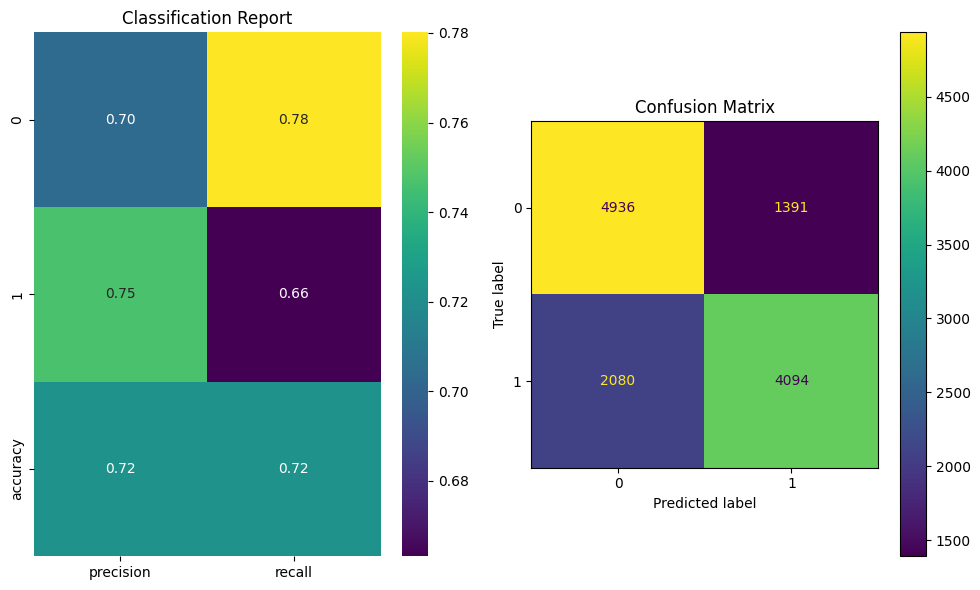

In [ ]:
# Predict on the test set
y_pred_2 = (model.predict(X_test) > 0.5).astype("int32")
performance_viz(y_test,y_pred_2)

Upon introducing L2 Regularization and dropout to the network architecture, accuracy dropped from 0.73 to 0.72. Indeed, the modified architecture --with dropout and regularization--reasonably increased the number of true negatives increased from 4810 to 4936, indicating the model performed better at correctly identifying healthy patients.

Furthermore, the number of number of true negatives increased from 4810 to 4936, indicating the model became better at correctly identifying healthy patients. However, it is worth pointing out that the number of false negatives were also increased upon adding regularization and dropout. Specifically, number of false negatives increased from 1881 to 2080, meaning more patients with cardiovascular disease were incorrectly classified as healthy.

The model also suffered a decline in true positives as the number of true positives decreased from 4293 to 4093, showing the model lost some efficacy at correctly identifying patients with cardiovascular disease.

Given the significant cost of false negatives (patients with cardiovascular disease) being incorrectly classified as healthy--combined with a dip in accuracy from 0.73 to 0.72 -- it can be argued that regularization and dropout didn't introduce sizeable improvement to the model performance.

This makes the case to do without them moving further as hyperparameter tuning is explored for achieving the best model architecture and consequent performance.

### Hyperparameter Tuning for Sequential Model

In [ ]:
# Split data further into training and validation set
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify=y_train)

In [ ]:
#Get shape of training and validation data
X_train.shape,X_val.shape

((37503, 25), (12501, 25))

In [ ]:
# Aligning model's input shape to the number of attributes in the training set
input_shape=(X_train.shape[1],)

# Function to build the Sequential model with range of hyperparameters for tuning

def build_model(hp):
  model=Sequential()
  #input layer
  model.add(Input(shape=input_shape))

  #first hidden layer with range of units and activation functions for tuning
  model.add(Dense(
          units=hp.Int("units_1",min_value=32,max_value=512,step=32),
          activation=hp.Choice("activation_1",["relu","tanh"])
      )),

  #Second hidden layer with range of units and activation functions for tuning
  model.add(
      Dense(
          units=hp.Int("units_2",min_value=32,max_value=512,step=32),
          activation=hp.Choice("activation_2",["relu","tanh"])
      )),

  #Third hidden layer with range of units and activation functions for tuning

  model.add(Dense(
          units=hp.Int("units_3",min_value=32,max_value=512,step=32),
          activation=hp.Choice("activation_3",["relu","tanh"])
      )),

  #Output Layer furnished with sigmoid activation for binary classification

  model.add(Dense(1,activation="sigmoid"))

  #Define the range of learning rates for tuning
  learning_rate=hp.Float("lr",min_value=0.0001,max_value=0.01)

  # Compile the Sequentail NN model with Adam optimizer, binary cross-entropy loss, and accuracy metric
  model.compile(
      optimizer=Adam(learning_rate=learning_rate),
      loss="binary_crossentropy",
      metrics=["accuracy"]
  )

  return model

#Construct NN model using keras_tuner HyperParameters for tuning
build_model(keras_tuner.HyperParameters())

In [ ]:
# Initializing the RandomSearch tuner for hyperparameter tuning
tuner=keras_tuner.RandomSearch(
    hypermodel=build_model, #function to build model
    objective="val_accuracy", #metric for optimization
    max_trials=10, #number of different hyperparameter sets to be explored during RandomSearch
    executions_per_trial=2, #Each set of hyperparameter to be evaluated twice
    directory="my_dir", #Directory to store search results
    project_name="MSc_dissertation" #Puroose of implementation
)

In [ ]:
#Early Stopping defined to combat overfitting and terminate training when validation accuracy fails to improve

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

# Executing the hyperparameter search on the training data
tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             callbacks=[early_stopping])

# Retrieve the best hyperparameters found from search
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0]
# Get the top three models based on search results
models = tuner.get_best_models(num_models=3)
#Extract the best-performing model from the top three models
best_model = models[0]
#Summrarize architecture of best-performing model from search
best_model.summary()

Trial 10 Complete [00h 01m 43s]
val_accuracy: 0.7279017865657806

Best val_accuracy So Far: 0.7329013645648956
Total elapsed time: 00h 15m 43s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                2496      
                                                                 
 dense_1 (Dense)             (None, 192)               18624     
                                                                 
 dense_2 (Dense)             (None, 64)                12352     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33537 (131.00 KB)
Trainable params: 33537 (131.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


KeyError: 'units does not exist.'

In [ ]:
#Summarizing architecture of best model retrieved from hyperparameter tuning
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                2496      
                                                                 
 dense_1 (Dense)             (None, 192)               18624     
                                                                 
 dense_2 (Dense)             (None, 64)                12352     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33537 (131.00 KB)
Trainable params: 33537 (131.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Examining the summary of the tuner search results
tuner.results_summary()

Results summary
Results in my_dir/MSc_dissertation
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
units_1: 96
activation_1: relu
units_2: 192
activation_2: relu
units_3: 64
activation_3: tanh
lr: 0.006707210036419797
Score: 0.7329013645648956

Trial 01 summary
Hyperparameters:
units_1: 288
activation_1: tanh
units_2: 512
activation_2: relu
units_3: 480
activation_3: relu
lr: 0.000456681434887246
Score: 0.7326613962650299

Trial 04 summary
Hyperparameters:
units_1: 384
activation_1: relu
units_2: 64
activation_2: relu
units_3: 352
activation_3: relu
lr: 0.0027380069462520046
Score: 0.7323014140129089

Trial 05 summary
Hyperparameters:
units_1: 416
activation_1: relu
units_2: 160
activation_2: tanh
units_3: 448
activation_3: tanh
lr: 0.004852942022432792
Score: 0.7302615940570831

Trial 02 summary
Hyperparameters:
units_1: 192
activation_1: tanh
units_2: 64
activation_2: relu
units_3: 32
activation_3: relu
lr: 0.00952995102616577

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.3f}")

Test Accuracy: 0.723


In [ ]:
# Evaluate the model on the val set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Test Accuracy: 0.7330


391/391 [==============================] - 1s 1ms/step


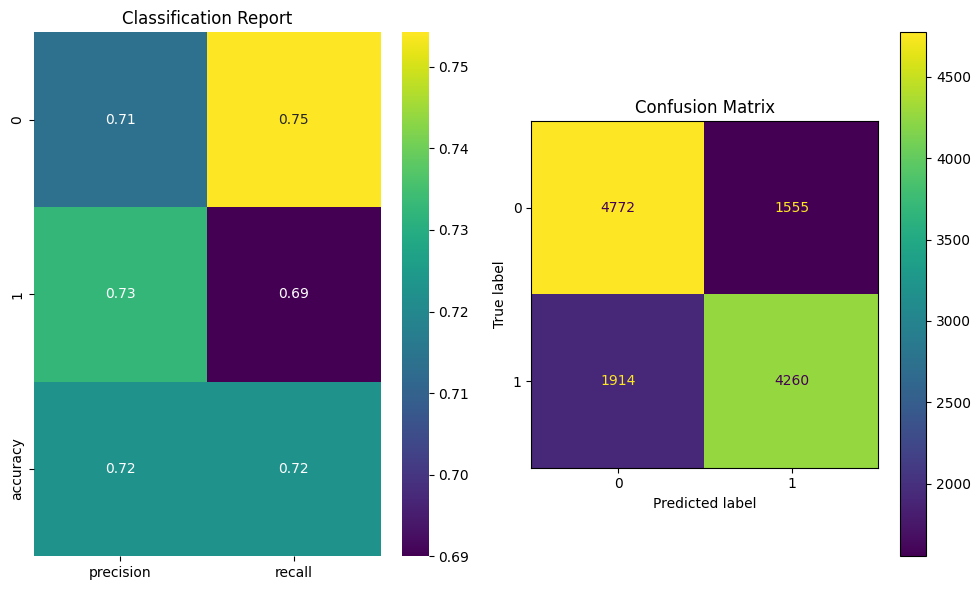

In [ ]:
# Generate predictions
y_pred_3 = (best_model.predict(X_test) > 0.5).astype("int32")
performance_viz(y_test,y_pred_3)

### Hyperparameter Search Analysis

In the parametization of the Keras hyperparameter tuning, "val_accuracy" was chosen as the objective. This befits the aim of the implementation as it directly measures how well the model generalizes during the tuner search and performs on unssen data.

A max_trials of 10 was chosen due to the need for a delicate balance between an expansive search space and computation constraints. While a more exhaustive search space could possibly identify a better packet of hyperparameters, it could come with enormous cost in computational resources.

However, by setting executions_per_trial at 2, the tuner search aims to reduce variance in results. Compensating for such variance is necessary as the inherent random initialization (as well as the stochastic optimization procedures) when training neural networks trigger variability. executions_per_trial of 2 therefore averages performance over two executions,utimately enabling the tuner search in mapping a more robust estimate of each hyperparameter configuration's efficacy.

From the tuner summary, the best configuration was seen to combine tanh and RELU activations. This is an interesting deviation from the tradition of exclusively using RELU activations for hidden layers in Sequential networks.

Overall, while the hyperparameter tuned model demonstrated improvements (compared to the regularized network) in reducing false negatives, its number of patients with CVD incorrectly given a clean bill of health (classified as negative) was higher than the base Sequential model first implemented.

That said, a validation accuracy of 0.733 and a test accuracy of 0.723 raises suspicions of overfitting of the model during tuning. Clearly, there is yet space for improvement.

The drop in test accuracy suggests the need for broader exploration or search space during tuning and a larger amount of training data to combat overfitting. This will be addressed, first by retraining the best model obtained from the Keras RandomSearch tuner on a larger amount of training data (concatenating the X_train and X_val used in the tuner search) and later on by introducing Hyperband Keras tuning

### Rebuilding Model for possible Improved Performance

Next,a model rebuild is initiated leveraging the best hyperparameters retrieved from the tuner. Furthermore, for richer data, the training and validation data (used in the tuner search) are combined.

In [ ]:
#Instantiating Callback to terminate training when the monitored loss stops improving
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Extract the best hyperparameters identified by the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Function to build the model with the best hyperparameters
def build_model(hp):
    model = Sequential()
    # Input layer
    model.add(Input(shape=input_shape))
    # First hidden layer constructed with units and activation from the best hyperparameters
    model.add(Dense(
        units=hp.get("units_1"),
        activation=hp.get("activation_1")
    ))

    # Second hidden layer constructed with units and activation from the best hyperparameters
    model.add(Dense(
        units=hp.get("units_2"),
        activation=hp.get("activation_2")
    ))

    # Third hidden layer constructed with units and activation from the best hyperparameters
    model.add(Dense(
        units=hp.get("units_3"),
        activation=hp.get("activation_3")
    ))
    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation="sigmoid"))


    # Set the learning rate from the best hyperparameters
    learning_rate = hp.get("lr")

    # Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Rebuild the model with the best hyperparameters
model = build_model(best_hps)

# Combine training and validation data
X_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))


# Retrain the model on the combined dataset
history_3=model.fit(X_all, y_all, epochs=200, batch_size=32,callbacks=[early_stopping], verbose=2)

# Evaluate the retrained model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/200
1563/1563 - 5s - loss: 0.5802 - accuracy: 0.7079 - 5s/epoch - 3ms/step
Epoch 2/200
1563/1563 - 4s - loss: 0.5658 - accuracy: 0.7168 - 4s/epoch - 3ms/step
Epoch 3/200
1563/1563 - 4s - loss: 0.5607 - accuracy: 0.7209 - 4s/epoch - 3ms/step
Epoch 4/200
1563/1563 - 4s - loss: 0.5597 - accuracy: 0.7211 - 4s/epoch - 3ms/step
Epoch 5/200
1563/1563 - 4s - loss: 0.5583 - accuracy: 0.7229 - 4s/epoch - 3ms/step
Epoch 6/200
1563/1563 - 4s - loss: 0.5563 - accuracy: 0.7233 - 4s/epoch - 3ms/step
Epoch 7/200
1563/1563 - 4s - loss: 0.5570 - accuracy: 0.7223 - 4s/epoch - 3ms/step
Epoch 8/200
1563/1563 - 4s - loss: 0.5564 - accuracy: 0.7241 - 4s/epoch - 3ms/step
Epoch 9/200
1563/1563 - 4s - loss: 0.5547 - accuracy: 0.7259 - 4s/epoch - 3ms/step
Epoch 10/200
1563/1563 - 4s - loss: 0.5544 - accuracy: 0.7249 - 4s/epoch - 3ms/step
Epoch 11/200
1563/1563 - 4s - loss: 0.5544 - accuracy: 0.7252 - 4s/epoch - 3ms/step
Epoch 12/200
1563/1563 - 4s - loss: 0.5547 - accuracy: 0.7234 - 4s/epoch - 3ms/step
E

391/391 [==============================] - 1s 1ms/step


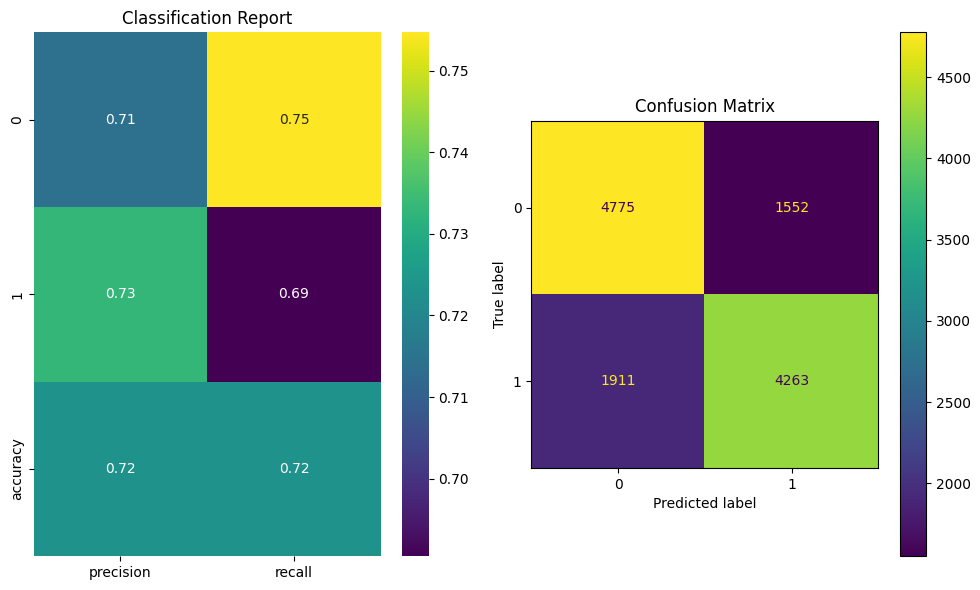

In [ ]:
# Generate predictions
y_pred_4= (model.predict(X_test) > 0.5).astype("int32")

# Evaluate performance

performance_viz(y_test,y_pred_4)

Interestingly, despite training the best model obtained on the tuner search on a richer dataset, the performance didn't dramatically improve. Precisely, there was remarkable similarity in their performance with test accuracy yet coming out at 0.723.
While not heartening, the best model from the tuner search when trained on a fuller dataset managed to slash false negatives from 4914 to 4911. Yet, this is not spectacular.Consequently, a Hyperband tuner search will be explored.

### Exploring Hyperband for Hyperparameter Tuning

Compared to traditional Bayersian Optimization methods deployed in Hyperparameter optimization, Hyperband emphasizes ramping up speed of the random search process via adaptive resource allocation.

It achieves this by using a:

> Principled early-stopping strategy to allocate resources, allowing it
to evaluate orders-of-magnitude more configurations than black-box procedures like Bayesian optimization methods. [Lisha Li et al](https://arxiv.org/abs/1603.06560)

In [ ]:
# Allocating more data volume to training

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=42,stratify=y_train)

input_shape = (X_train.shape[1],)

def build_model(hp):
    model = Sequential()
    # Input layer
    model.add(Input(shape=input_shape))

    # First hidden layer
    model.add(Dense(
        units=hp.Int("units_1", min_value=32, max_value=512, step=32),
        activation=hp.Choice("activation_1", ["relu", "tanh"])
    ))

    # Second hidden layer
    model.add(Dense(
        units=hp.Int("units_2", min_value=32, max_value=512, step=32),
        activation=hp.Choice("activation_2", ["relu", "tanh"])
    ))

    # Third hidden layer
    model.add(Dense(
        units=hp.Int("units_3", min_value=32, max_value=512, step=32),
        activation=hp.Choice("activation_3", ["relu", "tanh"])
    ))

    # Output layer
    model.add(Dense(1, activation="sigmoid"))

    learning_rate = hp.Float("lr", min_value=0.0001, max_value=0.01)

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Instantiating the Hyperband tuner while introducing the Factor parameter

tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective='val_accuracy',
    max_epochs=50,  # Maximum number of epochs to train each model
    factor=3,  # Reduction factor for the resource allocation
    directory='my_dir',
    project_name='MSc_dissertation_hyperband'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(patience=10)])

# Obtaining the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Get the best model directly
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluating the best model on the test set

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.3f}')


Trial 90 Complete [00h 03m 07s]
val_accuracy: 0.725679337978363

Best val_accuracy So Far: 0.725679337978363
Total elapsed time: 00h 47m 27s
391/391 [==============================] - 1s 2ms/step - loss: 0.5554 - accuracy: 0.7216
Test Accuracy: 0.722


In [ ]:
# Evaluate the Hyperband model on the val set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.7302


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/MSc_dissertation_hyperband
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0089 summary
Hyperparameters:
units_1: 96
activation_1: relu
units_2: 96
activation_2: tanh
units_3: 512
activation_3: relu
lr: 0.0007514116783122651
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.725679337978363

Trial 0073 summary
Hyperparameters:
units_1: 64
activation_1: relu
units_2: 512
activation_2: relu
units_3: 320
activation_3: relu
lr: 0.004354648757304011
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0067
Score: 0.7243853807449341

Trial 0050 summary
Hyperparameters:
units_1: 448
activation_1: tanh
units_2: 160
activation_2: relu
units_3: 512
activation_3: relu
lr: 0.0005214960905007427
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0047
Score: 0.7241501212120056

Trial 0047 summary
Hyperparameters:
units_1: 448
activati

### Wide and Deep Neural Networks with Functional API

In [ ]:
# Segment continuous features in the CVD dataset by selecting columns with more than 20 unique values
num_features=data.columns[data.nunique()>20].tolist()
# Segment categorical features in the CVD dataset by selecting columns with 20 or fewer unique values
wide_features=data.columns[data.nunique()<20].tolist()
# Remove the target 'cardio' feature from the list of categorical attributes
wide_features.remove("cardio")
y=data["cardio"] #Creating target label

In [ ]:
#Allocate continuous features as input features for the deep part of the Wide and Deep model
X_deep=data[num_features]
#Allocate categorical features as input features for the wide part of the Wide and Deep model
X_wide=data[wide_features]

In [ ]:
X_deep.head(2) #First two rows of the deep input features

age  height  weight  ap_hi  ap_lo  pulse_pressure         MAP        bmi
0   50     168    62.0    110     80              30   90.000000  21.967120
1   55     156    85.0    140     90              50  106.666667  34.927679

In [ ]:
X_deep_train,X_deep_test,X_wide_train,X_wide_test,y_train,y_test=train_test_split(X_deep,X_wide,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
scaler=MinMaxScaler() #Instantiating MinMaxscaler for normalizing continuous features

In [ ]:
X_deep_train=scaler.fit_transform(X_deep_train) #Fit to scaler to deep training features and normalize
X_deep_test=scaler.transform(X_deep_test) #Normalize deep test features

In [ ]:
#Converting training and test wide features to numpy arrays befitting for NN implementation
X_wide_train=X_wide_train.values
X_wide_test=X_wide_test.values

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 300)                  2700      ['deep_input[0][0]']          
                                                                                                  
 batch_normalization (Batch  (None, 300)                  1200      ['dense[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 300)                  0         ['batch_normalization[0][0

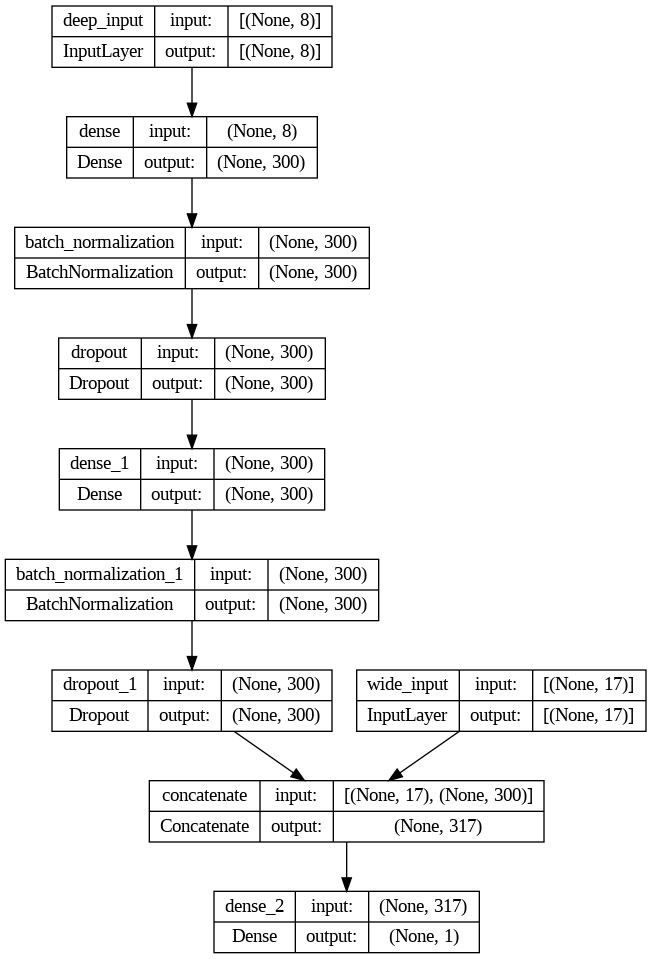

In [ ]:
#Build Wide and Deep Network with Functional API

# Determining the shapes for the wide and deep input layers
wide_shape=(X_wide.shape[1],)
deep_shape=(X_deep.shape[1],)

# Creating input layers for the wide and deep parts of the network
input_wide=Input(shape=wide_shape,name="wide_input")
input_deep=Input(shape=deep_shape,name="deep_input")

# Building the first hidden layer for the deep part with 300 neurons and ReLU activation
hidden1=Dense(300,activation="relu")(input_deep)

# Applying batch normalization to the first hidden layer
bn1=BatchNormalization()(hidden1)

# Applying dropout layer to the first hidden layer with a dropout rate of 25%
dropout_1=Dropout(0.25)(bn1)

# Building second hidden layer for the deep part with 300 neurons and ReLU activation
hidden2=Dense(300,activation="relu")(dropout_1)

# Applying batch normalization to the second hidden layer
bn2=BatchNormalization()(hidden2)

# Applying dropout layer to the second hidden layer with a dropout rate of 25%
dropout_2=Dropout(0.25)(bn2)

# Concatenating the wide and deep parts of the network
concat=Concatenate()([input_wide,dropout_2])

# Create the output layer with 1 neuron and sigmoid activation for binary classification
output=Dense(1,activation="sigmoid")(concat)

# Constructing the model harnessing functional API with the defined input layers and output layer
model=Model(inputs=[input_wide,input_deep],outputs=[output])

# Compiling the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer=Adam(learning_rate=0.001))

model.summary()

# Plot the model
plot_model(model, to_file='wide_and_deep_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Initializing EarlyStopping callback to terminate training when validation loss stops improving consecutively for 10 epochs
early_stopping=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True)

# Training the model with the training data, including validation split and early stopping
history=model.fit((X_wide_train,X_deep_train),y_train,validation_split=0.2,callbacks=[early_stopping],batch_size=32,epochs=200)

Epoch 1/200
1251/1251 [==============================] - 11s 5ms/step - loss: 0.6032 - accuracy: 0.6965 - val_loss: 0.5633 - val_accuracy: 0.7207
Epoch 2/200
1251/1251 [==============================] - 6s 5ms/step - loss: 0.5678 - accuracy: 0.7188 - val_loss: 0.5636 - val_accuracy: 0.7232
Epoch 3/200
1251/1251 [==============================] - 6s 5ms/step - loss: 0.5624 - accuracy: 0.7208 - val_loss: 0.5681 - val_accuracy: 0.7258
Epoch 4/200
1251/1251 [==============================] - 6s 5ms/step - loss: 0.5632 - accuracy: 0.7220 - val_loss: 0.5733 - val_accuracy: 0.7274
Epoch 5/200
1251/1251 [==============================] - 6s 5ms/step - loss: 0.5613 - accuracy: 0.7224 - val_loss: 0.5574 - val_accuracy: 0.7274
Epoch 6/200
1251/1251 [==============================] - 6s 5ms/step - loss: 0.5602 - accuracy: 0.7215 - val_loss: 0.5596 - val_accuracy: 0.7251
Epoch 7/200
1251/1251 [==============================] - 6s 5ms/step - loss: 0.5604 - accuracy: 0.7236 - val_loss: 0.5609 - val_a

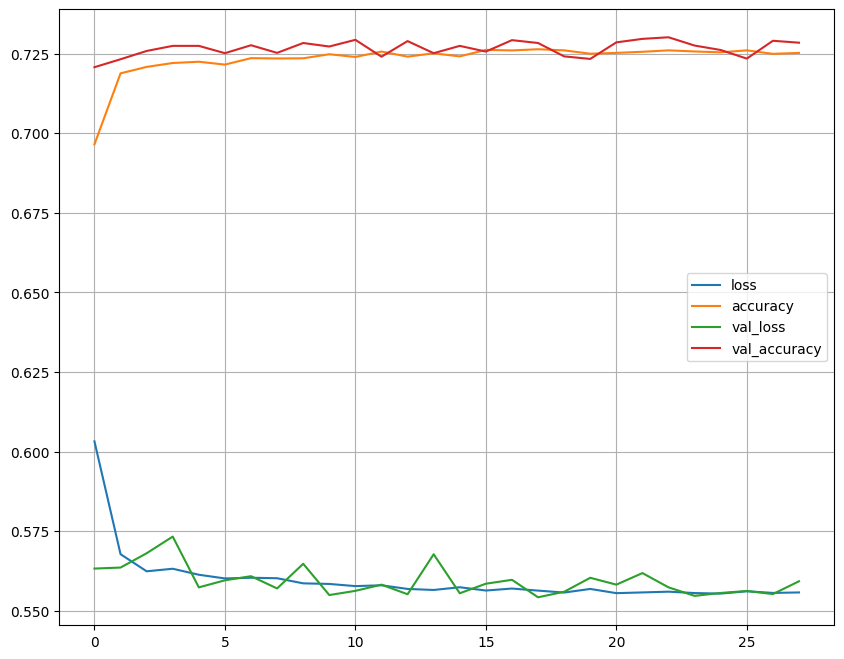

In [ ]:
#Visualizing Training and Validation Performance
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#Evaluate model performance on unseen data
model.evaluate((X_wide_test,X_deep_test),y_test)

391/391 [==============================] - 1s 2ms/step - loss: 0.5560 - accuracy: 0.7258


[0.5560152530670166, 0.7257819175720215]

### Hyparameter Tuning with Functional API



Trial 90 Complete [00h 01m 20s]
val_accuracy: 0.7285271286964417

Best val_accuracy So Far: 0.7308269143104553
Total elapsed time: 01h 05m 33s
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 8)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 484)                  4356      ['deep_input[0][0]']          
                                                                                                  
 batch_normalization_2 (Bat  (None, 484)                  1936      ['dense_3[0][0]']             
 chNormalization)                                                                                 
                                                

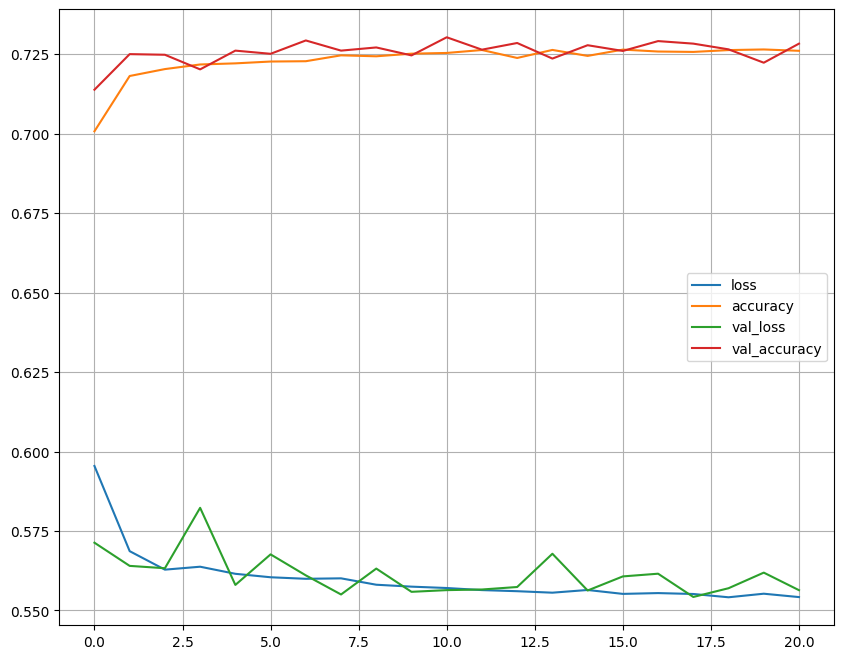

391/391 [==============================] - 1s 2ms/step - loss: 0.5586 - accuracy: 0.7253
Test Loss from keras tuner Hyperband search is: 0.559
Test Accuracy from keras tuner Hyperband search is:: 0.725


In [ ]:
# Constructing function to build the model with hyperparameters for keras tuner search

def build_model(hp):

    # Specifying range of hyperparameters for keras tuner search

    num_units = hp.Int('num_units', min_value=100, max_value=512, step=32) # Range of units in dense layers
    choice_activation=hp.Choice("activation",["relu","tanh"]) # Types of activation function to explore in search
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1) #Range of dropout rates to be explored in search
    learning_rate = hp.Choice('lr', values=[1e-2, 1e-3, 1e-4]) #Range of learning rates to be explored in search

    # Define input shapes for wide and deep parts of the network
    wide_shape = (X_wide.shape[1],)
    deep_shape = (X_deep.shape[1],)

    #Construct input layers
    input_wide = Input(shape=wide_shape, name="wide_input")
    input_deep = Input(shape=deep_shape, name="deep_input")

    # Define hidden layers for the deep part of the Wide and Deep model, including batch normalization and dropout
    hidden1 = Dense(num_units, activation=choice_activation)(input_deep)
    bn1 = BatchNormalization()(hidden1)
    dropout_1 = Dropout(dropout_rate)(bn1)

    hidden2 = Dense(num_units, activation=choice_activation)(dropout_1)
    bn2 = BatchNormalization()(hidden2)
    dropout_2 = Dropout(dropout_rate)(bn2)

    # Concatenating wide and deep parts
    concat = Concatenate()([input_wide, dropout_2])
    output = Dense(1, activation="sigmoid")(concat)

    #Building the Wide and Deep model
    model = Model(inputs=[input_wide, input_deep], outputs=[output])

    # Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
    model.compile(
        loss="binary_crossentropy",
        metrics=["accuracy"],
        optimizer=Adam(learning_rate=learning_rate)
    )

    return model

# Instantiate the keras tuner Hyperband search

tuner = keras_tuner.Hyperband(
    hypermodel=build_model, # Model-building function
    objective='val_accuracy',  # Objective to optimize
    max_epochs=50, # Maximum number of epochs for training
    factor=3,  # Reduction factor for Hyperband
    directory='my_dir',
    project_name='Functional_API_hyperband'
)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(patience=10, monitor="val_accuracy", restore_best_weights=True)

# Run the hyperparameter search with training data
tuner.search(
    (X_wide_train, X_deep_train), y_train,
    validation_split=0.2, # Split 20% of the training data for validation
    epochs=200, #Set number of epochs for even trial
    callbacks=[early_stopping] #Early stopping to terminate training when model consistently does not improve
)

# Extracting the best hyperparameters from keras tuner search

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Building the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

# Retrain the best model on the combined training and validation data
history_tuner = best_model.fit(
    (X_wide_train, X_deep_train), y_train,
    validation_split=0.2,
    callbacks=[early_stopping],
    batch_size=32,
    epochs=200
)

#Visualizing Training and Validation Performance
pd.DataFrame(history_tuner.history).plot(figsize=(10,8))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

# Evaluate performance of retrained model on the test set
test_loss, test_accuracy = best_model.evaluate((X_wide_test, X_deep_test), y_test)
print(f'Test Loss from keras tuner Hyperband search is: {test_loss:.3f}')
print(f'Test Accuracy from keras tuner Hyperband search is:: {test_accuracy:.3f}')

## **STACKING ENSEMBLES**

### Building Stacking Model with GradientBoostingClassifier as MetaClassifier

In [ ]:
num_features = data.columns[data.nunique() > 20] # Segment continuous features having more than 20 unique values
X, y = data.drop("cardio", axis=1), data["cardio"] #Segment dataset in X and y features

# Split the CVD dataset into training and test sets, with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Furthermore, split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Define a Column Transformer preprocessor to scale numerical features while sparing other features
preprocessor = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), num_features)],
    remainder="passthrough"
)

#Applying scaling transformation from preprocessor to training, validation, and test sets
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

#Construct function to build an ensemble of base learners
def build_models():

    models = [] #List to accomodate all base models in ensemble

    lg_clf = LogisticRegression(C=0.1, penalty='l1', solver='saga',random_state=42)  #Instantiate Logistic Regression model with best hyperparameters from tuning search

    #Instantiate Random Forest classifier model with best hyperparameters from tuning search;however max_features was changed from "auto" to "sqrt" because of scikit compatibility concerns
    rf_clf = RandomForestClassifier(
        bootstrap=False, criterion='entropy', max_depth=9,
        max_features='sqrt', min_samples_leaf=7, min_samples_split=5, n_estimators=82,random_state=42)

    #Instantiate Support Vector Classifier with best default parameters
    svc_clf = SVC(probability=True,random_state=42)

    nn_clf = MLPClassifier(random_state=42) #Instantiate Multilayer Perceptron Classifier with default parameters

    # Add models to the list with their names
    models.append(("Logistic Regression", lg_clf))
    models.append(("RandomForest Classifier", rf_clf))
    models.append(("Support Vector Classifier", svc_clf))
    models.append(("Multilayer Perceptron", nn_clf))

    return models

# Construct function to fit the blender model using predictions from base models

def fit_blender(models, X_train, y_train, X_val, y_val):
    meta_X = [] #packet of predictions or meta features from base learners

    #Iteratively fit each model in list ti training data and predict on validation data
    for name, model in models:
        model.fit(X_train, y_train)
        prediction = model.predict_proba(X_val)[:, 1]  # Using probability for positive classs
        meta_X.append(prediction.reshape(-1, 1))  # Ensure predictions are column vectors

    meta_X = np.hstack(meta_X) # Horizontally stack predictions to create meta-features for the blender

    #Build Gradient Boosting Classifier as blender model with hyperparameters from GBC Hyperparameter tuning
    blender=GradientBoostingClassifier(
        learning_rate=0.054919062035559456, loss='log_loss',
        max_features='log2', min_samples_leaf=7,
        min_samples_split=46, n_estimators=598, subsample=1,random_state=42)

    blender.fit(meta_X, y_val) #Fit blender to validation data

    return blender

def predict_blender(models, blender, X_test):
    meta_X = []
    for name, model in models:
        predicted = model.predict_proba(X_test)[:, 1]  # Use probability predictions
        meta_X.append(predicted.reshape(-1, 1))  # Ensure predictions are column vectors

    meta_X = np.hstack(meta_X) # Stack predictions horizontally to create meta-features for the blender
    final_pred = blender.predict(meta_X) # Use the Gradient Boosting classsifier model to predict

    return final_pred

# Build, fit, and predict using the blender model
models = build_models()
blender = fit_blender(models, X_train, y_train, X_val, y_val)
final_predictions = predict_blender(models, blender, X_test)

# Evaluate the final predictions
score = accuracy_score(y_test, final_predictions)
print(f"Accuracy from blending implementation is {score:.3f}")


Accuracy from blending implementation is 0.726


### Examining the Performance of Individual Models in Stack

In [ ]:
# Split the dataset into training and test sets with stratification to maintain class balance
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Define a Column Transformer preprocessor to scale Continuous features while leaving other features in CVD dataset unchanged
preprocessor = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), num_features)],
    remainder="passthrough"
)

# Applying the preprocessor to the training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


# Defining a function to instantiate base models

def base_models():
    models = [] # List to accomodate all the base models

    #Instantiate Logistic Regression model with best hyperparameters from tuning search
    lg_clf = LogisticRegression(C=0.1, penalty='l1', solver='saga',random_state=42)

    #Instantiate Logistic Regression model with best hyperparameters from tuning search
    gradboost_clf = GradientBoostingClassifier(
        learning_rate=0.054919062035559456, loss='log_loss',
        max_features='log2', min_samples_leaf=7,
        min_samples_split=46, n_estimators=598, subsample=1,random_state=42)

    #Instantiate Support Vector Classifier model with default hyperparameters
    svc_clf = SVC(probability=True,random_state=42)

    #Instantiate Random Forest classifier model with best hyperparameters from tuning search;however max_features was changed from "auto" to "sqrt" because of scikit compatibility concerns
    rf_clf = RandomForestClassifier(
        bootstrap=False, criterion='entropy', max_depth=9,
        max_features='auto', min_samples_leaf=7, min_samples_split=5, n_estimators=82,random_state=42)

    #Instantiate Multilayer Perceptron model with default hyperparameters
    nn_clf = MLPClassifier(random_state=42)

    #Add instantiated models to list of models
    models.append(("Logistic Regression", lg_clf))
    models.append(("RandomForest Classifier", rf_clf))
    models.append(("Gradient Boosting Classifier", gradboost_clf))
    models.append(("Support Vector Classifier", svc_clf))
    models.append(("Multilayer Perceptron", nn_clf))

    return models

models=base_models()

#Iteratively fit each model in the list of models to training data and predict on test data, evaluating accuracy

for name,model in models:

    model.fit(X_train,y_train)
    predictions=model.predict(X_test)

    accuracy=accuracy_score(y_test,predictions)

    print(f"The accuracy of {name} is {accuracy:.3f}")

The accuracy of Logistic Regression is 0.719
The accuracy of RandomForest Classifier is 0.726
The accuracy of Gradient Boosting Classifier is 0.729
The accuracy of Support Vector Classifier is 0.720
The accuracy of Multilayer Perceptron is 0.727


### Implementation for Sequential Neural Network as MetaClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6914 - loss: 0.5825 - val_accuracy: 0.7409 - val_loss: 0.5328
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7275 - loss: 0.5522 - val_accuracy: 0.7404 - val_loss: 0.5348
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7305 - loss: 0.5569 - val_accuracy: 0.7420 - val_loss: 0.5295
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7353 - loss: 0.5484 - val_accuracy: 0.7351 - val_loss: 0.5301
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7334 - loss: 0.5501 - val_accuracy: 0.7351 - val_loss: 0.5358
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7329 - loss: 0.5507 - val_accuracy: 0.7399 - val_loss: 0.5330
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7255 - loss: 0.5510 - val_accuracy: 

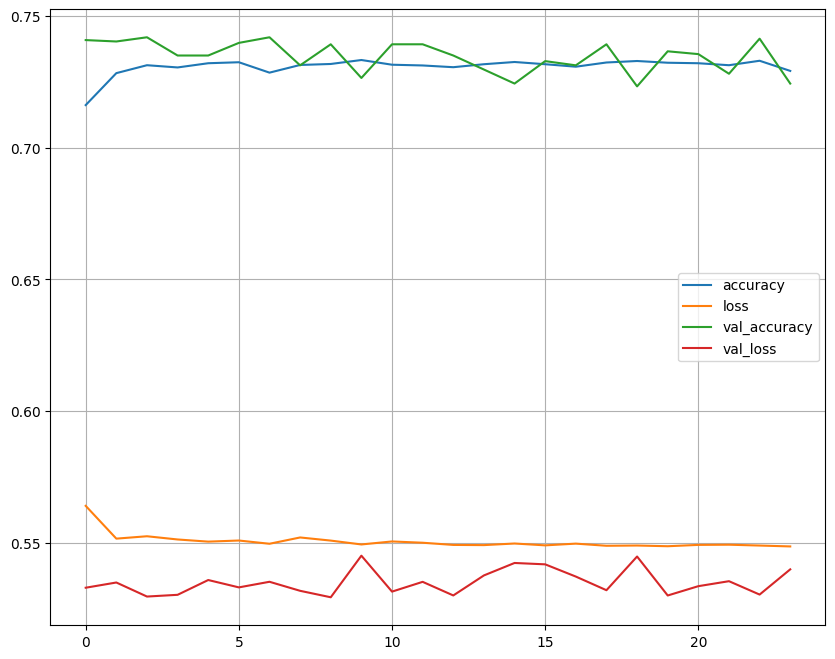

391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
Accuracy from blending implementation with NN meta classifier is 0.729


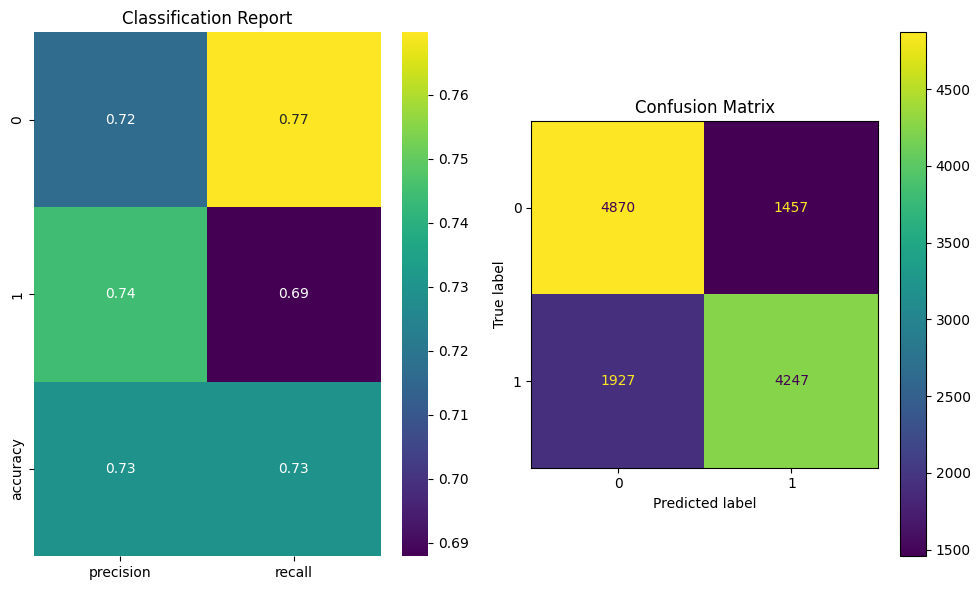

In [ ]:
num_features = data.columns[data.nunique() > 20] # Segment continuous features having more than 20 unique values
X, y = data.drop("cardio", axis=1), data["cardio"] #Segment dataset in X and y features

# Split the CVD dataset into training and test sets, with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Furthermore, split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Define a Column Transformer preprocessor to scale numerical features while sparing other features
preprocessor = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), num_features)],
    remainder="passthrough"
)
#Applying scaling transformation from preprocessor to training, validation, and test sets
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

#Construct function to build an ensemble of base learners
def build_models():
    models = [] #List to accomodate all base models in ensemble

    #Instantiate Logistic Regression model with best hyperparameters from tuning search
    lg_clf = LogisticRegression(C=0.1, penalty='l1', solver='saga', random_state=42)

    #Instantiate Random Forest classifier model with best hyperparameters from tuning search, with max_features changed to "sqrt" for scikit recent compatibility requirements
    rf_clf = RandomForestClassifier(
        bootstrap=False, criterion='entropy', max_depth=9,
        max_features='sqrt', min_samples_leaf=7, min_samples_split=5, n_estimators=82, random_state=42)

    #Instantiate Support Vector Classifier with best default parameters
    svc_clf = SVC(probability=True, random_state=42)

    #Instantiate Multilayer Perceptron Classifier
    nn_clf = MLPClassifier(random_state=42)

    # Add models to the list with their names
    models.append(("Logistic Regression", lg_clf))
    models.append(("RandomForest Classifier", rf_clf))
    models.append(("Support Vector Classifier", svc_clf))
    models.append(("Multilayer Perceptron", nn_clf))

    return models

# Construct function to fit the blender model using predictions from base models
def fit_sequential_blender(models, X_train, y_train, X_val, y_val):
    meta_X = [] #packet of predictions or meta features from base learners

    #Iteratively fit each model in list ti training data and predict on validation data
    for name, model in models:
        model.fit(X_train, y_train)
        prediction = model.predict_proba(X_val)[:, 1]  # Use probability predictions
        meta_X.append(prediction.reshape(-1, 1))  # Ensure predictions are column vectors

    meta_X = np.hstack(meta_X) # Horizontally stack predictions to create meta-features for the blender

    # Build and compile the Sequential model
    input_shape = (meta_X.shape[1],)

    #Define Sequential Neural Network as blender model with hyperparameters from NN Hyperparameter tuning
    blender = Sequential([
        Input(shape=input_shape),
        Dense(units=288, activation="tanh"),
        Dense(units=512, activation="relu"),
        Dense(units=480, activation="relu"),
        Dense(units=1, activation="sigmoid")
    ])

    #Compile blender model with Adam optimizer, binary-crossentropy loss function and accuracy metrics
    blender.compile(optimizer=Adam(learning_rate=0.0004566814348872),
                    loss='binary_crossentropy', metrics=['accuracy'])

    #Implement early stopping callback to prevent overfitting
    early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

    # Fit the Sequential model
    blender_history = blender.fit(meta_X, y_val, epochs=50, validation_split=0.15,
                                  batch_size=16, verbose=1, callbacks=[early_stopping])

    return blender, blender_history

def predict_blender(models, blender, X_test):
    meta_X = []
    for name, model in models:
        predicted = model.predict_proba(X_test)[:, 1]  # Use probability predictions
        meta_X.append(predicted.reshape(-1, 1))  # Ensure predictions are column vectors

    meta_X = np.hstack(meta_X) # Stack predictions horizontally to create meta-features for the blender

    final_pred = (blender.predict(meta_X) > 0.5).astype("int32").flatten()  # Use the Sequential model to predict

    return final_pred

# Build, fit, and predict using the blender model
models = build_models()
blender_model, blender_history = fit_sequential_blender(models, X_train, y_train, X_val, y_val)

# Visualizing Training and Validation Performance
pd.DataFrame(blender_history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.show()

# Make final predictions on the test set using the blender model
final_predictions = predict_blender(models, blender_model, X_test)

# Evaluate the final predictions
score = accuracy_score(y_test, final_predictions)
print(f"Accuracy from blending implementation with NN meta classifier is {score:.3f}")

performance_viz(y_test,final_predictions)


### Implementation for Soft and Hard Voting Classifier

Accuracy from soft Voting Classifier is: 0.725


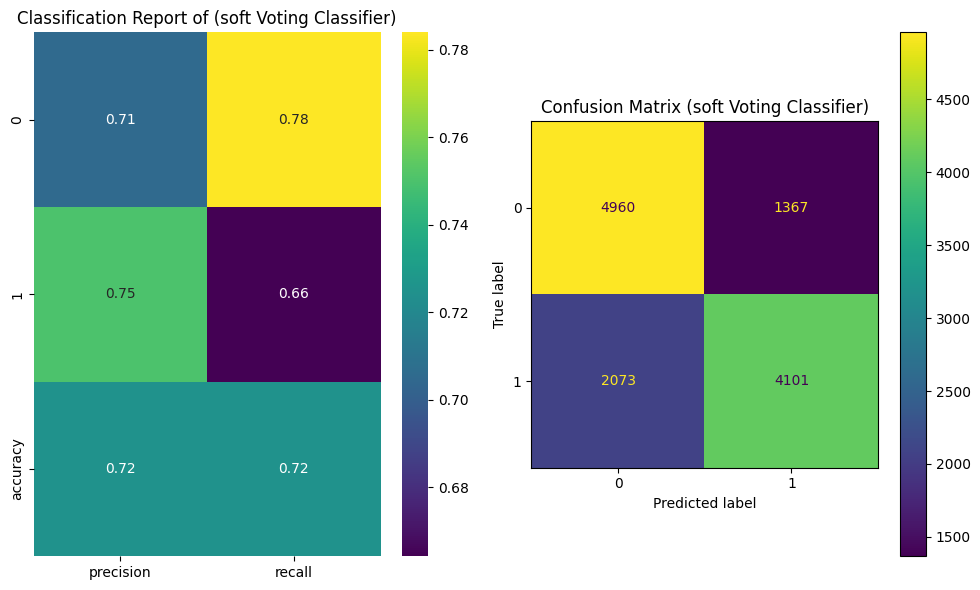

Accuracy from hard Voting Classifier is: 0.725


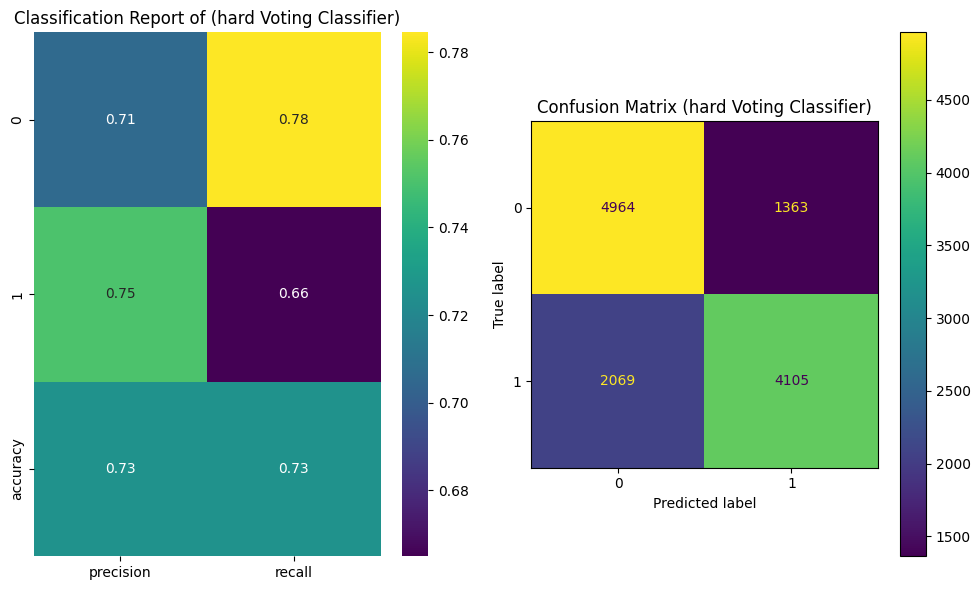

In [ ]:
# Modifying the performance visualizer function for each Voting Classifier type

def voting_performance_viz(y_test, y_pred, voting_type):
    report = classification_report(y_test, y_pred, output_dict=True)
    report = pd.DataFrame(report).transpose()
    cm = confusion_matrix(y_test, y_pred)

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))

    # Plot classification report heatmap
    sns.heatmap(report.iloc[:-2, :-2], cmap="viridis", annot=True, fmt=".2f", ax=ax[0])
    ax[0].set_title(f"Classification Report of ({voting_type} Voting Classifier)")

    # Plot confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis', ax=ax[1])
    ax[1].set_title(f"Confusion Matrix ({voting_type} Voting Classifier)")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()



# Split the dataset into training and test sets with stratification to maintain class balance
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Define a Column Transformer preprocessor to scale numerical features while passing through other features unchanged
preprocessor = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), num_features)],
    remainder="passthrough"
)

# Apply the preprocessor to the training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#Construct function to instantiate the base models
def base_models():
    models = [] #List of models to accomodate all base models

    # Instantiate the Logistic Regression model with best parameters found from tuning
    lg_clf = LogisticRegression(C=0.1, penalty='l1', solver='saga',random_state=42)

    # Instantiate the Gradient Boosting classifier model with best parameters found from tuning
    gradboost_clf = GradientBoostingClassifier(
        learning_rate=0.054919062035559456, loss='log_loss',
        max_features='log2', min_samples_leaf=7,
        min_samples_split=46, n_estimators=598, subsample=1,random_state=42)

    # Instantiate the Support Vector classifier model with default parameters
    svc_clf = SVC(probability=True,random_state=42)

    #Instantiate Random Forest classifier model with best hyperparameters from tuning search, with max_features changed to "sqrt" for scikit recent compatibility requirements
    rf_clf = RandomForestClassifier(
        bootstrap=False, criterion='entropy', max_depth=9,
        max_features='sqrt', min_samples_leaf=7, min_samples_split=5, n_estimators=82,random_state=42)

    # Instantiate the Multilayer perceptron model with default parameters
    nn_clf = MLPClassifier(random_state=42)

    # Add all the models to the list with their names

    models.append(("Logistic Regression", lg_clf))
    models.append(("RandomForest Classifier", rf_clf))
    models.append(("Gradient Boosting Classifier", gradboost_clf))
    models.append(("Support Vector Classifier", svc_clf))
    models.append(("Multilayer Perceptron", nn_clf))

    return models

#Instantiating base models
base_models=base_models()

# Function to create and evaluate a voting classifier, both hard and soft voting

def voting_classifier(models,voting):
    # Create voting classifier based on specified voting type (soft or hard)
    if voting=="soft":
        voting_clf = VotingClassifier(estimators=base_models, voting='soft')

    if voting=="hard":
        voting_clf = VotingClassifier(estimators=base_models, voting='hard')

    # Fit the voting classifier on the training data
    voting_clf.fit(X_train, y_train)
    voting_pred = voting_clf.predict(X_test)

     # Calculate the accuracy of the voting classifier
    voting_accuracy = accuracy_score(y_test, voting_pred)
    print(f'Accuracy from {voting} Voting Classifier is: {voting_accuracy:.3f}')

    voting_performance_viz(y_test, voting_pred, voting)

    return voting_accuracy

# Evaluate both soft and hard voting classifiers

for voter in ["soft","hard"]:
    voting_classifier(base_models,voter)
